# Thesis Notebook - Draft

In [6]:
import pandas as pd
import numpy as np
import warnings
import pickle as pkl
import statsmodels.api as sm

from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy.stats import norm

from semipar.estimation.estimate import semipar_fit
from semipar.estimation.estimate_auxiliary import estimate_treatment_propensity
from hackathon_auxiliary import parametric_mte
from hackathon_auxiliary import calculate_cof_int
from hackathon_auxiliary import plot_common_support
from hackathon_auxiliary import bootstrap
from hackathon_auxiliary import par_fit

from grmpy.estimate.estimate_output import calculate_mte
from grmpy.check.auxiliary import read_data
from grmpy.read.read import read

warnings.filterwarnings('ignore')

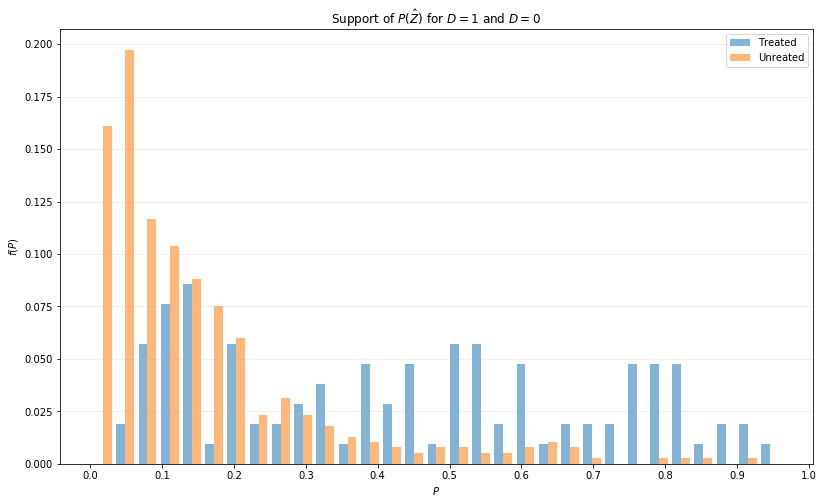

In [6]:
plot_common_support("semipar/files/soep_uni03.yml", nbins=31) 

Common support ranges from 0.04 to 0.72. It increases up to 0.91 when the number of histogram bins is reduced.

The sample is composed of 490 indiviudals without migration background, including men and women born between 1950 and 1971 in West Germany. Dropping females would drastically reduce sample size, which would be problematic for the common support assumption. <br>

Identification of the MTE depends critically on the common support of the propensity score. Common support is defined as the region where the support of $P(z)$ given $D=1$ and the support of $P(z)$ given $D=0$ overlap.

It is not the simply the range from the smallest propensity observed in the treated sample to the maximum propensity observed in the untreated sample, as their marginal supports might not overlap in between. This would become evident by "holes" and "dents" in the histograms above. 

Although we observe positive frequencies for $P(z)$ up to 0.91 in the untreated subpopulation, the continuously overlapping support stops at 0.72.

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  490
Model:                         Probit   Df Residuals:                      461
Method:                           MLE   Df Model:                           28
Date:                Fri, 29 Nov 2019   Pseudo R-squ.:                  0.2634
Time:                        17:03:25   Log-Likelihood:                -187.53
converged:                       True   LL-Null:                       -254.59
                                        LLR p-value:                 8.245e-16
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2294.2779   1146.290      2.001      0.045      47.591    4540.965
sex                          -0.4182      0.152     -2.752      0.006      -0.716     

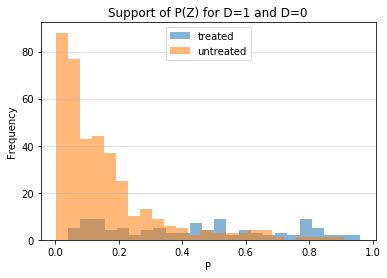

In [10]:
quantiles, mte_u, mte_x, mte = semipar_fit("semipar/files/soep_uni03.yml")

In [7]:
np.random.seed(123)

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  490
Model:                         Probit   Df Residuals:                      461
Method:                           MLE   Df Model:                           28
Date:                Fri, 29 Nov 2019   Pseudo R-squ.:                  0.3569
Time:                        16:58:57   Log-Likelihood:                -176.14
converged:                       True   LL-Null:                       -273.88
                                        LLR p-value:                 4.869e-27
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       363.4411   1470.685      0.247      0.805   -2519.048    3245.930
sex                          -0.4530      0.164     -2.760      0.006      -0.775     


    Common support lies beteen:

        0.02301380021157585 and
        0.9448543216252505
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4.437
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.12e-13
Time:                        16:58:57   Log-Likelihood:                -264.76
No. Observations:                 397   AIC:                             597.5
Df Residuals:                     363   BIC:                             733.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.012066338489919896 and
        0.9385781432002185
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.383
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.44e-13
Time:                        16:58:57   Log-Likelihood:                -320.53
No. Observations:                 463   AIC:                             709.1
Df Residuals:                     429   BIC:                             849.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.011185923413744485 and
        0.7470280271570433
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.636
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.47e-10
Time:                        16:58:58   Log-Likelihood:                -230.22
No. Observations:                 420   AIC:                             528.4
Df Residuals:                     386   BIC:                             665.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.021266343120631685 and
        0.9325154719614759
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.593
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.84e-06
Time:                        16:58:58   Log-Likelihood:                -219.03
No. Observations:                 370   AIC:                             506.1
Df Residuals:                     336   BIC:                             639.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03431152525790224 and
        0.9291628039043663
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.288
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.61e-08
Time:                        16:58:58   Log-Likelihood:                -216.98
No. Observations:                 360   AIC:                             502.0
Df Residuals:                     326   BIC:                             634.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.013974592749940166 and
        0.8141533887929919
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     4.451
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.47e-13
Time:                        16:58:58   Log-Likelihood:                -197.77
No. Observations:                 412   AIC:                             463.5
Df Residuals:                     378   BIC:                             600.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03584885662956282 and
        0.9683103847336264
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     3.033
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.90e-07
Time:                        16:58:59   Log-Likelihood:                -203.55
No. Observations:                 342   AIC:                             475.1
Df Residuals:                     308   BIC:                             605.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02611577395972545 and
        0.7073147088256413
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     5.419
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.20e-17
Time:                        16:58:59   Log-Likelihood:                -234.92
No. Observations:                 419   AIC:                             537.8
Df Residuals:                     385   BIC:                             675.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.029316953551499183 and
        0.8575518713158301
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.154
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.95e-08
Time:                        16:58:59   Log-Likelihood:                -238.90
No. Observations:                 372   AIC:                             545.8
Df Residuals:                     338   BIC:                             679.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0222474957475145 and
        0.8969311448459345
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.558
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.91e-10
Time:                        16:58:59   Log-Likelihood:                -305.93
No. Observations:                 412   AIC:                             679.9
Df Residuals:                     378   BIC:                             816.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.026164140176956088 and
        0.9724598791208932
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.069
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.55e-08
Time:                        16:59:00   Log-Likelihood:                -257.43
No. Observations:                 389   AIC:                             582.9
Df Residuals:                     355   BIC:                             717.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.017315441022408583 and
        0.9625403254113094
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4.041
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.05e-12
Time:                        16:59:00   Log-Likelihood:                -278.39
No. Observations:                 408   AIC:                             624.8
Df Residuals:                     374   BIC:                             761.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02283396682032057 and
        0.8970507415211892
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     4.866
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.67e-15
Time:                        16:59:00   Log-Likelihood:                -167.43
No. Observations:                 361   AIC:                             402.9
Df Residuals:                     327   BIC:                             535.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04751755705138513 and
        0.967810193553592
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     2.562
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.85e-06
Time:                        16:59:00   Log-Likelihood:                -280.38
No. Observations:                 405   AIC:                             628.8
Df Residuals:                     371   BIC:                             764.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.04646534026529864 and
        0.8099640909455971
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.647
Date:                Fri, 29 Nov 2019   Prob (F-statistic):             0.0165
Time:                        16:59:01   Log-Likelihood:                -215.27
No. Observations:                 311   AIC:                             498.5
Df Residuals:                     277   BIC:                             625.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02146429397155288 and
        0.8133300054763639
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.504
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.52e-05
Time:                        16:59:01   Log-Likelihood:                -219.69
No. Observations:                 399   AIC:                             507.4
Df Residuals:                     365   BIC:                             643.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04728445770798927 and
        0.9761098216901224
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.543
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.31e-13
Time:                        16:59:01   Log-Likelihood:                -166.99
No. Observations:                 368   AIC:                             402.0
Df Residuals:                     334   BIC:                             534.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.01618717792218493 and
        0.9070859962818905
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.263
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.26e-08
Time:                        16:59:01   Log-Likelihood:                -287.51
No. Observations:                 418   AIC:                             643.0
Df Residuals:                     384   BIC:                             780.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.01808339008523227 and
        0.7998045927362909
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     3.309
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.12e-08
Time:                        16:59:02   Log-Likelihood:                -218.31
No. Observations:                 379   AIC:                             504.6
Df Residuals:                     345   BIC:                             638.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.029129250151899884 and
        0.9265930853773819
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.49e-10
Time:                        16:59:02   Log-Likelihood:                -256.11
No. Observations:                 395   AIC:                             580.2
Df Residuals:                     361   BIC:                             715.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.024431456496296085 and
        0.973014860093408
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     6.243
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.74e-20
Time:                        16:59:02   Log-Likelihood:                -240.93
No. Observations:                 366   AIC:                             549.9
Df Residuals:                     332   BIC:                             682.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.013109411069513263 and
        0.9729941530760692
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.820
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.97e-11
Time:                        16:59:02   Log-Likelihood:                -220.58
No. Observations:                 437   AIC:                             509.2
Df Residuals:                     403   BIC:                             647.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.019947778178003275 and
        0.9609007045977712
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.516
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.34e-09
Time:                        16:59:03   Log-Likelihood:                -243.51
No. Observations:                 398   AIC:                             555.0
Df Residuals:                     364   BIC:                             690.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.012861587982830295 and
        0.9090994188365354
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.617
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.17e-10
Time:                        16:59:03   Log-Likelihood:                -300.57
No. Observations:                 452   AIC:                             669.1
Df Residuals:                     418   BIC:                             809.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.023442771132259507 and
        0.894126843585843
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     4.798
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.32e-15
Time:                        16:59:03   Log-Likelihood:                -247.38
No. Observations:                 387   AIC:                             562.8
Df Residuals:                     353   BIC:                             697.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02019290928915261 and
        0.876808158407389
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.327
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.72e-09
Time:                        16:59:04   Log-Likelihood:                -219.59
No. Observations:                 376   AIC:                             507.2
Df Residuals:                     342   BIC:                             640.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.017854638902540663 and
        0.8891182322735585
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     5.831
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.48e-19
Time:                        16:59:04   Log-Likelihood:                -242.92
No. Observations:                 439   AIC:                             553.8
Df Residuals:                     405   BIC:                             692.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.05086441018388367 and
        0.7363213591837925
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.737
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.98e-10
Time:                        16:59:04   Log-Likelihood:                -243.95
No. Observations:                 382   AIC:                             555.9
Df Residuals:                     348   BIC:                             690.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.039676762552044956 and
        0.8919381962614121
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4.025
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.39e-11
Time:                        16:59:04   Log-Likelihood:                -263.39
No. Observations:                 378   AIC:                             594.8
Df Residuals:                     344   BIC:                             728.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.013624329606871577 and
        0.9419207070718651
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     3.323
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.16e-09
Time:                        16:59:05   Log-Likelihood:                -230.34
No. Observations:                 401   AIC:                             528.7
Df Residuals:                     367   BIC:                             664.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03390142082586916 and
        0.880167747505308
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     5.657
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.81e-18
Time:                        16:59:05   Log-Likelihood:                -194.18
No. Observations:                 368   AIC:                             456.4
Df Residuals:                     334   BIC:                             589.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.043600402443310676 and
        0.8263194159396264
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     3.218
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.40e-08
Time:                        16:59:05   Log-Likelihood:                -220.76
No. Observations:                 349   AIC:                             509.5
Df Residuals:                     315   BIC:                             640.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.04150882756294587 and
        0.9440539976174657
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     5.798
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.73e-18
Time:                        16:59:05   Log-Likelihood:                -222.23
No. Observations:                 360   AIC:                             512.5
Df Residuals:                     326   BIC:                             644.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.017136554152846737 and
        0.8135345088607695
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4.911
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.47e-15
Time:                        16:59:06   Log-Likelihood:                -243.23
No. Observations:                 422   AIC:                             554.5
Df Residuals:                     388   BIC:                             692.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02535433912242654 and
        0.8136305585990243
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     5.963
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.27e-19
Time:                        16:59:06   Log-Likelihood:                -198.24
No. Observations:                 358   AIC:                             464.5
Df Residuals:                     324   BIC:                             596.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.008002322648927555 and
        0.8149411778037308
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     5.719
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.11e-19
Time:                        16:59:06   Log-Likelihood:                -264.05
No. Observations:                 454   AIC:                             596.1
Df Residuals:                     420   BIC:                             736.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.060379329677109524 and
        0.8126207189402472
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.386
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.42e-05
Time:                        16:59:07   Log-Likelihood:                -199.24
No. Observations:                 337   AIC:                             466.5
Df Residuals:                     303   BIC:                             596.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.05451090212665868 and
        0.91783504197794
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.268
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.73e-12
Time:                        16:59:07   Log-Likelihood:                -237.45
No. Observations:                 366   AIC:                             542.9
Df Residuals:                     332   BIC:                             675.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------


    Common support lies beteen:

        0.015895182065370824 and
        0.9847413758092323
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     3.358
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.94e-09
Time:                        16:59:07   Log-Likelihood:                -228.49
No. Observations:                 355   AIC:                             525.0
Df Residuals:                     321   BIC:                             656.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.029285521646796424 and
        0.7871579076373263
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.625
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.47e-06
Time:                        16:59:07   Log-Likelihood:                -274.04
No. Observations:                 386   AIC:                             616.1
Df Residuals:                     352   BIC:                             750.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.020258313763068924 and
        0.7755281286012102
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     5.376
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.08e-16
Time:                        16:59:08   Log-Likelihood:                -115.57
No. Observations:                 348   AIC:                             299.1
Df Residuals:                     314   BIC:                             430.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02779494378833896 and
        0.9835040542894447
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.965
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.23e-07
Time:                        16:59:08   Log-Likelihood:                -275.08
No. Observations:                 406   AIC:                             618.2
Df Residuals:                     372   BIC:                             754.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.034825852741015455 and
        0.9669352662686233
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.720
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.77e-06
Time:                        16:59:08   Log-Likelihood:                -237.68
No. Observations:                 356   AIC:                             543.4
Df Residuals:                     322   BIC:                             675.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.021514217618001798 and
        0.9428574008726328
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2.927
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.27e-07
Time:                        16:59:09   Log-Likelihood:                -253.93
No. Observations:                 401   AIC:                             575.9
Df Residuals:                     367   BIC:                             711.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.014694442521167892 and
        0.8091227515742383
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.891
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.55e-11
Time:                        16:59:09   Log-Likelihood:                -255.82
No. Observations:                 434   AIC:                             579.6
Df Residuals:                     400   BIC:                             718.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03340878670905443 and
        0.9895551859478795
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     4.986
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.50e-15
Time:                        16:59:09   Log-Likelihood:                -176.01
No. Observations:                 325   AIC:                             420.0
Df Residuals:                     291   BIC:                             548.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04894630950640781 and
        0.9570998006460587
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.020
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.46e-07
Time:                        16:59:09   Log-Likelihood:                -200.79
No. Observations:                 326   AIC:                             469.6
Df Residuals:                     292   BIC:                             598.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.033404852435967684 and
        0.8809143514401158
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     4.820
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.49e-15
Time:                        16:59:10   Log-Likelihood:                -221.28
No. Observations:                 376   AIC:                             510.6
Df Residuals:                     342   BIC:                             644.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0349105159937164 and
        0.8986613173225731
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.390
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.01e-08
Time:                        16:59:10   Log-Likelihood:                -170.57
No. Observations:                 319   AIC:                             409.1
Df Residuals:                     285   BIC:                             537.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.04485845262678223 and
        0.9440505315483827
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.476
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.40e-05
Time:                        16:59:10   Log-Likelihood:                -240.35
No. Observations:                 348   AIC:                             548.7
Df Residuals:                     314   BIC:                             679.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.023273374477282092 and
        0.8859684719447884
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     3.029
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.04e-07
Time:                        16:59:11   Log-Likelihood:                -275.03
No. Observations:                 434   AIC:                             618.1
Df Residuals:                     400   BIC:                             756.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02692359302004934 and
        0.9072991499597237
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.856
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.47e-11
Time:                        16:59:11   Log-Likelihood:                -246.84
No. Observations:                 396   AIC:                             561.7
Df Residuals:                     362   BIC:                             697.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.027048335961677102 and
        0.9688795301347494
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.581
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.38e-06
Time:                        16:59:11   Log-Likelihood:                -310.71
No. Observations:                 407   AIC:                             689.4
Df Residuals:                     373   BIC:                             825.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.009067465847357159 and
        0.9445231397266014
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     4.576
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.98e-14
Time:                        16:59:11   Log-Likelihood:                -260.69
No. Observations:                 438   AIC:                             589.4
Df Residuals:                     404   BIC:                             728.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.028914075598672106 and
        0.8389331634059385
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.539
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.18e-05
Time:                        16:59:12   Log-Likelihood:                -262.76
No. Observations:                 385   AIC:                             593.5
Df Residuals:                     351   BIC:                             727.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.037658010082872305 and
        0.8864483432365166
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3.990
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.38e-11
Time:                        16:59:12   Log-Likelihood:                -247.49
No. Observations:                 404   AIC:                             563.0
Df Residuals:                     370   BIC:                             699.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.010962349561952415 and
        0.8480907967298266
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.866
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.37e-07
Time:                        16:59:12   Log-Likelihood:                -242.52
No. Observations:                 383   AIC:                             553.0
Df Residuals:                     349   BIC:                             687.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.008329962045450981 and
        0.7962754474715414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.803
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.36e-11
Time:                        16:59:13   Log-Likelihood:                -251.40
No. Observations:                 447   AIC:                             570.8
Df Residuals:                     413   BIC:                             710.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.046331940265348995 and
        0.8953277295272166
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     4.023
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.73e-11
Time:                        16:59:13   Log-Likelihood:                -190.21
No. Observations:                 364   AIC:                             448.4
Df Residuals:                     330   BIC:                             580.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.027985359134087555 and
        0.880790517657807
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.790
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.51e-10
Time:                        16:59:13   Log-Likelihood:                -234.03
No. Observations:                 364   AIC:                             536.1
Df Residuals:                     330   BIC:                             668.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04194714403159801 and
        0.9414289464910574
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.948
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.24e-11
Time:                        16:59:13   Log-Likelihood:                -222.37
No. Observations:                 369   AIC:                             512.7
Df Residuals:                     335   BIC:                             645.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.015851334378241176 and
        0.9580861032431939
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.390
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.14e-09
Time:                        16:59:14   Log-Likelihood:                -227.44
No. Observations:                 381   AIC:                             522.9
Df Residuals:                     347   BIC:                             656.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.04258412647607648 and
        0.9329047265116638
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.085
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           0.000581
Time:                        16:59:14   Log-Likelihood:                -287.12
No. Observations:                 365   AIC:                             642.2
Df Residuals:                     331   BIC:                             774.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02644467069147276 and
        0.8705459932274315
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.999
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.58e-11
Time:                        16:59:14   Log-Likelihood:                -264.69
No. Observations:                 387   AIC:                             597.4
Df Residuals:                     353   BIC:                             732.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.01185026406403849 and
        0.9509450206224924
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     2.986
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.68e-07
Time:                        16:59:15   Log-Likelihood:                -260.90
No. Observations:                 422   AIC:                             589.8
Df Residuals:                     388   BIC:                             727.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.0305973444085315 and
        0.8455354993823446
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.757
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.67e-10
Time:                        16:59:15   Log-Likelihood:                -254.08
No. Observations:                 381   AIC:                             576.2
Df Residuals:                     347   BIC:                             710.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.056965194693868314 and
        0.9600070763151652
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.070
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.17e-07
Time:                        16:59:15   Log-Likelihood:                -169.63
No. Observations:                 360   AIC:                             407.3
Df Residuals:                     326   BIC:                             539.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03186130559306228 and
        0.8654002944718896
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3.007
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.40e-07
Time:                        16:59:16   Log-Likelihood:                -270.83
No. Observations:                 418   AIC:                             609.7
Df Residuals:                     384   BIC:                             746.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.005667376931759487 and
        0.8829360823468344
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3.003
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.66e-07
Time:                        16:59:16   Log-Likelihood:                -227.57
No. Observations:                 397   AIC:                             523.1
Df Residuals:                     363   BIC:                             658.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.05727804617511652 and
        0.9198736877219351
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2.787
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.49e-06
Time:                        16:59:16   Log-Likelihood:                -245.93
No. Observations:                 361   AIC:                             559.9
Df Residuals:                     327   BIC:                             692.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04262214670433609 and
        0.8229150213366284
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     3.382
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.07e-09
Time:                        16:59:16   Log-Likelihood:                -191.42
No. Observations:                 344   AIC:                             450.8
Df Residuals:                     310   BIC:                             581.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.008785429406354366 and
        0.9358632394017253
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     4.829
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.03e-15
Time:                        16:59:17   Log-Likelihood:                -287.64
No. Observations:                 451   AIC:                             643.3
Df Residuals:                     417   BIC:                             783.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02396003642572632 and
        0.8929985379716852
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3.662
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.07e-10
Time:                        16:59:17   Log-Likelihood:                -272.95
No. Observations:                 407   AIC:                             613.9
Df Residuals:                     373   BIC:                             750.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02704345791735927 and
        0.8899980803180043
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     5.149
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.61e-16
Time:                        16:59:17   Log-Likelihood:                -240.60
No. Observations:                 356   AIC:                             549.2
Df Residuals:                     322   BIC:                             681.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.018289495693315953 and
        0.8778972044606403
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     3.341
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.41e-09
Time:                        16:59:18   Log-Likelihood:                -279.65
No. Observations:                 409   AIC:                             627.3
Df Residuals:                     375   BIC:                             763.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.022222174785427963 and
        0.9245105091433816
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2.941
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.19e-07
Time:                        16:59:18   Log-Likelihood:                -248.42
No. Observations:                 385   AIC:                             564.8
Df Residuals:                     351   BIC:                             699.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.10998252938412212 and
        0.91103869030615
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     3.436
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.29e-08
Time:                        16:59:18   Log-Likelihood:                -141.92
No. Observations:                 245   AIC:                             351.8
Df Residuals:                     211   BIC:                             470.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------


    Common support lies beteen:

        0.012186441930479165 and
        0.8318845633360774
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.939
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.50e-11
Time:                        16:59:19   Log-Likelihood:                -277.30
No. Observations:                 440   AIC:                             622.6
Df Residuals:                     406   BIC:                             761.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03880783080329243 and
        0.7841044196959306
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2.954
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.28e-07
Time:                        16:59:19   Log-Likelihood:                -193.99
No. Observations:                 329   AIC:                             456.0
Df Residuals:                     295   BIC:                             585.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.037907516079394986 and
        0.7788610407816551
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.918
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.09e-07
Time:                        16:59:19   Log-Likelihood:                -233.47
No. Observations:                 378   AIC:                             534.9
Df Residuals:                     344   BIC:                             668.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02926772993564206 and
        0.9485174135044244
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.790
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.83e-06
Time:                        16:59:19   Log-Likelihood:                -219.82
No. Observations:                 326   AIC:                             507.6
Df Residuals:                     292   BIC:                             636.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04068835466549655 and
        0.8528882492097558
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     5.004
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.18e-14
Time:                        16:59:20   Log-Likelihood:                -83.784
No. Observations:                 255   AIC:                             235.6
Df Residuals:                     221   BIC:                             356.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04138132127190272 and
        0.8442533435612389
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     3.055
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.36e-07
Time:                        16:59:20   Log-Likelihood:                -231.49
No. Observations:                 359   AIC:                             531.0
Df Residuals:                     325   BIC:                             663.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.010346001770355167 and
        0.9483678090673886
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.979
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.77e-07
Time:                        16:59:20   Log-Likelihood:                -326.65
No. Observations:                 425   AIC:                             721.3
Df Residuals:                     391   BIC:                             859.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0464070036029339 and
        0.978554218330465
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     1.646
Date:                Fri, 29 Nov 2019   Prob (F-statistic):             0.0152
Time:                        16:59:21   Log-Likelihood:                -312.42
No. Observations:                 381   AIC:                             692.8
Df Residuals:                     347   BIC:                             826.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------


    Common support lies beteen:

        0.009580142283276931 and
        0.973958946689246
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.870
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.86e-11
Time:                        16:59:21   Log-Likelihood:                -302.50
No. Observations:                 443   AIC:                             673.0
Df Residuals:                     409   BIC:                             812.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.026919014098915676 and
        0.9586238182747848
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.884
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.17e-07
Time:                        16:59:21   Log-Likelihood:                -255.17
No. Observations:                 390   AIC:                             578.3
Df Residuals:                     356   BIC:                             713.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.012667787571894433 and
        0.8942635255259659
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     3.555
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.08e-09
Time:                        16:59:22   Log-Likelihood:                -203.20
No. Observations:                 383   AIC:                             474.4
Df Residuals:                     349   BIC:                             608.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.023037808615260304 and
        0.8594415125851527
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.262
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.37e-08
Time:                        16:59:22   Log-Likelihood:                -152.40
No. Observations:                 313   AIC:                             372.8
Df Residuals:                     279   BIC:                             500.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02946718057073291 and
        0.8934711056038277
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.169
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           0.000295
Time:                        16:59:22   Log-Likelihood:                -273.61
No. Observations:                 363   AIC:                             615.2
Df Residuals:                     329   BIC:                             747.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.005963129635996315 and
        0.8820148482778185
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.117
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.72e-08
Time:                        16:59:23   Log-Likelihood:                -285.78
No. Observations:                 428   AIC:                             639.6
Df Residuals:                     394   BIC:                             777.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.032279751469145024 and
        0.8988646258012404
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     5.825
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.72e-18
Time:                        16:59:23   Log-Likelihood:                -208.55
No. Observations:                 353   AIC:                             485.1
Df Residuals:                     319   BIC:                             616.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.039786165420816526 and
        0.8075822826073211
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     4.399
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.92e-13
Time:                        16:59:23   Log-Likelihood:                -185.59
No. Observations:                 343   AIC:                             439.2
Df Residuals:                     309   BIC:                             569.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03050802593232799 and
        0.8765749236476632
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.134
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.78e-08
Time:                        16:59:24   Log-Likelihood:                -185.27
No. Observations:                 329   AIC:                             438.5
Df Residuals:                     295   BIC:                             567.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.032891364073330195 and
        0.866247456066845
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     3.310
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.14e-08
Time:                        16:59:24   Log-Likelihood:                -212.39
No. Observations:                 375   AIC:                             492.8
Df Residuals:                     341   BIC:                             626.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02250502464258308 and
        0.9772645070381015
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     3.594
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.36e-10
Time:                        16:59:24   Log-Likelihood:                -256.00
No. Observations:                 373   AIC:                             580.0
Df Residuals:                     339   BIC:                             713.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03449565649626594 and
        0.776933293139187
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2.427
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.41e-05
Time:                        16:59:25   Log-Likelihood:                -286.07
No. Observations:                 364   AIC:                             640.1
Df Residuals:                     330   BIC:                             772.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.020042767250911073 and
        0.8522029056094587
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     4.305
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.06e-13
Time:                        16:59:25   Log-Likelihood:                -224.65
No. Observations:                 411   AIC:                             517.3
Df Residuals:                     377   BIC:                             653.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.021524808034009944 and
        0.9733588757167904
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.978
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.92e-07
Time:                        16:59:25   Log-Likelihood:                -294.43
No. Observations:                 411   AIC:                             656.9
Df Residuals:                     377   BIC:                             793.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03896371699127006 and
        0.9206026990297786
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     4.162
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.69e-12
Time:                        16:59:26   Log-Likelihood:                -303.98
No. Observations:                 403   AIC:                             676.0
Df Residuals:                     369   BIC:                             811.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.015280163821272414 and
        0.9763703404101075
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.461
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.89e-09
Time:                        16:59:26   Log-Likelihood:                -279.29
No. Observations:                 419   AIC:                             626.6
Df Residuals:                     385   BIC:                             763.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03998112886979591 and
        0.933506217103144
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.160
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.73e-08
Time:                        16:59:26   Log-Likelihood:                -198.92
No. Observations:                 332   AIC:                             465.8
Df Residuals:                     298   BIC:                             595.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.025673385265630583 and
        0.9086093167303392
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.833
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.08e-10
Time:                        16:59:27   Log-Likelihood:                -240.27
No. Observations:                 359   AIC:                             548.5
Df Residuals:                     325   BIC:                             680.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.026477538557506165 and
        0.9055881629771918
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     5.643
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.55e-18
Time:                        16:59:27   Log-Likelihood:                -187.61
No. Observations:                 383   AIC:                             443.2
Df Residuals:                     349   BIC:                             577.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02431606308796073 and
        0.8870761548185655
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     4.544
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.26e-13
Time:                        16:59:27   Log-Likelihood:                -210.21
No. Observations:                 369   AIC:                             488.4
Df Residuals:                     335   BIC:                             621.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.028416526293819445 and
        0.8456025137771646
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.258
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.68e-08
Time:                        16:59:28   Log-Likelihood:                -221.09
No. Observations:                 387   AIC:                             510.2
Df Residuals:                     353   BIC:                             644.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0137436731542875 and
        0.9173978157860021
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3.240
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.72e-08
Time:                        16:59:28   Log-Likelihood:                -324.25
No. Observations:                 405   AIC:                             716.5
Df Residuals:                     371   BIC:                             852.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.0340289451665208 and
        0.9387444073197253
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2.889
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.56e-07
Time:                        16:59:28   Log-Likelihood:                -242.38
No. Observations:                 371   AIC:                             552.8
Df Residuals:                     337   BIC:                             685.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.04206810372502403 and
        0.959828993006178
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3.265
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.38e-08
Time:                        16:59:29   Log-Likelihood:                -254.73
No. Observations:                 403   AIC:                             577.5
Df Residuals:                     369   BIC:                             713.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.04022098494891518 and
        0.770253616140241
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.275
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.75e-08
Time:                        16:59:29   Log-Likelihood:                -203.12
No. Observations:                 296   AIC:                             474.2
Df Residuals:                     262   BIC:                             599.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.021706463573490216 and
        0.9559436285433989
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.243
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.05e-08
Time:                        16:59:29   Log-Likelihood:                -269.33
No. Observations:                 380   AIC:                             606.7
Df Residuals:                     346   BIC:                             740.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.01890389989163123 and
        0.9720860354385449
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.614
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.83e-06
Time:                        16:59:30   Log-Likelihood:                -318.62
No. Observations:                 439   AIC:                             705.2
Df Residuals:                     405   BIC:                             844.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.027177588262037356 and
        0.9507672422386884
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     4.801
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.76e-15
Time:                        16:59:30   Log-Likelihood:                -235.39
No. Observations:                 383   AIC:                             538.8
Df Residuals:                     349   BIC:                             673.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02167413009752957 and
        0.7609628403855963
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     6.223
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.25e-20
Time:                        16:59:30   Log-Likelihood:                -161.34
No. Observations:                 353   AIC:                             390.7
Df Residuals:                     319   BIC:                             522.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.01595885801300784 and
        0.9329810838822279
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.037
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.11e-07
Time:                        16:59:31   Log-Likelihood:                -259.59
No. Observations:                 410   AIC:                             587.2
Df Residuals:                     376   BIC:                             723.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.024309469220218653 and
        0.9836072393561801
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     3.403
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.38e-09
Time:                        16:59:31   Log-Likelihood:                -250.95
No. Observations:                 416   AIC:                             569.9
Df Residuals:                     382   BIC:                             706.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.017850042508549376 and
        0.8964974312274185
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2.940
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.18e-07
Time:                        16:59:32   Log-Likelihood:                -203.62
No. Observations:                 386   AIC:                             475.2
Df Residuals:                     352   BIC:                             609.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.035822308686275506 and
        0.9386308251328458
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.388
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.79e-05
Time:                        16:59:32   Log-Likelihood:                -341.39
No. Observations:                 429   AIC:                             750.8
Df Residuals:                     395   BIC:                             888.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.04828851239605312 and
        0.7943433950964011
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     3.396
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.55e-09
Time:                        16:59:32   Log-Likelihood:                -261.15
No. Observations:                 352   AIC:                             590.3
Df Residuals:                     318   BIC:                             721.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.021562355387682336 and
        0.9715877554431387
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.122
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.23e-12
Time:                        16:59:33   Log-Likelihood:                -272.92
No. Observations:                 450   AIC:                             613.8
Df Residuals:                     416   BIC:                             753.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03039708919209689 and
        0.9274454159105636
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.697
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.99e-06
Time:                        16:59:33   Log-Likelihood:                -219.94
No. Observations:                 379   AIC:                             507.9
Df Residuals:                     345   BIC:                             641.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02534532981306884 and
        0.8755639303063028
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     8.141
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.03e-24
Time:                        16:59:33   Log-Likelihood:                -159.01
No. Observations:                 278   AIC:                             386.0
Df Residuals:                     244   BIC:                             509.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.010954109123616716 and
        0.8052651056257512
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.696
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.80e-10
Time:                        16:59:34   Log-Likelihood:                -268.87
No. Observations:                 429   AIC:                             605.7
Df Residuals:                     395   BIC:                             743.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.019653984944133465 and
        0.9453735863068549
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3.729
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.48e-10
Time:                        16:59:34   Log-Likelihood:                -290.46
No. Observations:                 416   AIC:                             648.9
Df Residuals:                     382   BIC:                             786.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.025347311260713296 and
        0.86818610802129
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.049
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.40e-08
Time:                        16:59:35   Log-Likelihood:                -283.79
No. Observations:                 420   AIC:                             635.6
Df Residuals:                     386   BIC:                             772.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.03386785073588476 and
        0.9647009348982059
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.983
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.60e-07
Time:                        16:59:35   Log-Likelihood:                -211.26
No. Observations:                 359   AIC:                             490.5
Df Residuals:                     325   BIC:                             622.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03885467177982377 and
        0.9468660778134376
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     6.941
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.65e-22
Time:                        16:59:35   Log-Likelihood:                -182.81
No. Observations:                 328   AIC:                             433.6
Df Residuals:                     294   BIC:                             562.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03196714936510912 and
        0.8956508700074935
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.819
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.91e-14
Time:                        16:59:36   Log-Likelihood:                -171.89
No. Observations:                 313   AIC:                             411.8
Df Residuals:                     279   BIC:                             539.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.017136929183286933 and
        0.8856250752402497
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2.934
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.22e-07
Time:                        16:59:36   Log-Likelihood:                -276.37
No. Observations:                 393   AIC:                             620.7
Df Residuals:                     359   BIC:                             755.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03767229636090353 and
        0.7493670480726886
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.642
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.15e-10
Time:                        16:59:36   Log-Likelihood:                -221.76
No. Observations:                 349   AIC:                             511.5
Df Residuals:                     315   BIC:                             642.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.015366688966044036 and
        0.9314294380197928
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3.095
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.43e-08
Time:                        16:59:37   Log-Likelihood:                -322.33
No. Observations:                 439   AIC:                             712.7
Df Residuals:                     405   BIC:                             851.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.019676680580997037 and
        0.8905057650536476
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.870
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.23e-11
Time:                        16:59:37   Log-Likelihood:                -227.22
No. Observations:                 406   AIC:                             522.4
Df Residuals:                     372   BIC:                             658.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.015664584816102015 and
        0.8487303536163842
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3.506
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.60e-10
Time:                        16:59:37   Log-Likelihood:                -304.44
No. Observations:                 449   AIC:                             676.9
Df Residuals:                     415   BIC:                             816.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.007081113711056339 and
        0.8373490602397536
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     5.332
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.53e-17
Time:                        16:59:38   Log-Likelihood:                -330.78
No. Observations:                 448   AIC:                             729.6
Df Residuals:                     414   BIC:                             869.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.022259116717343548 and
        0.9199787411982265
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3.783
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.07e-10
Time:                        16:59:38   Log-Likelihood:                -215.70
No. Observations:                 398   AIC:                             499.4
Df Residuals:                     364   BIC:                             634.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.01496421788009146 and
        0.7785251706878626
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2.884
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.26e-07
Time:                        16:59:39   Log-Likelihood:                -183.15
No. Observations:                 361   AIC:                             434.3
Df Residuals:                     327   BIC:                             566.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.021232559125183823 and
        0.7550328659709101
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     4.902
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.73e-15
Time:                        16:59:39   Log-Likelihood:                -268.19
No. Observations:                 394   AIC:                             604.4
Df Residuals:                     360   BIC:                             739.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02997920556537313 and
        0.8896351680367139
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     7.648
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.28e-27
Time:                        16:59:39   Log-Likelihood:                -227.70
No. Observations:                 428   AIC:                             523.4
Df Residuals:                     394   BIC:                             661.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.029933361524866538 and
        0.9286260996001758
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     2.840
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.67e-07
Time:                        16:59:40   Log-Likelihood:                -258.45
No. Observations:                 417   AIC:                             584.9
Df Residuals:                     383   BIC:                             722.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03043314056068627 and
        0.940175004008509
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     4.563
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.87e-14
Time:                        16:59:40   Log-Likelihood:                -214.85
No. Observations:                 373   AIC:                             497.7
Df Residuals:                     339   BIC:                             631.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.038112952183780566 and
        0.8387386085280129
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.309
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.33e-13
Time:                        16:59:41   Log-Likelihood:                -229.80
No. Observations:                 418   AIC:                             527.6
Df Residuals:                     384   BIC:                             664.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.033096665078579765 and
        0.7484575853879243
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.951
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.66e-07
Time:                        16:59:41   Log-Likelihood:                -242.20
No. Observations:                 352   AIC:                             552.4
Df Residuals:                     318   BIC:                             683.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.00726271750989619 and
        0.8403111863335488
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3.097
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.92e-08
Time:                        16:59:41   Log-Likelihood:                -250.89
No. Observations:                 398   AIC:                             569.8
Df Residuals:                     364   BIC:                             705.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03769496217121494 and
        0.9747930967710912
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.777
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.37e-15
Time:                        16:59:42   Log-Likelihood:                -270.67
No. Observations:                 422   AIC:                             609.3
Df Residuals:                     388   BIC:                             746.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.046797428208630046 and
        0.8855131430602752
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     3.243
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.25e-08
Time:                        16:59:42   Log-Likelihood:                -191.82
No. Observations:                 308   AIC:                             451.6
Df Residuals:                     274   BIC:                             578.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02717340032007798 and
        0.8896210646281684
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     2.151
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           0.000316
Time:                        16:59:43   Log-Likelihood:                -268.46
No. Observations:                 392   AIC:                             604.9
Df Residuals:                     358   BIC:                             739.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.016849410094252292 and
        0.7163863534886286
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.728
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.36e-10
Time:                        16:59:43   Log-Likelihood:                -249.00
No. Observations:                 347   AIC:                             566.0
Df Residuals:                     313   BIC:                             696.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02701335390172103 and
        0.9596561524554875
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4.368
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.37e-13
Time:                        16:59:43   Log-Likelihood:                -252.22
No. Observations:                 362   AIC:                             572.4
Df Residuals:                     328   BIC:                             704.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03153533857020673 and
        0.946000946495855
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     6.444
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.33e-21
Time:                        16:59:44   Log-Likelihood:                -207.99
No. Observations:                 368   AIC:                             484.0
Df Residuals:                     334   BIC:                             616.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.0525738647170646 and
        0.8011599892039935
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     3.585
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.17e-09
Time:                        16:59:44   Log-Likelihood:                -168.65
No. Observations:                 284   AIC:                             405.3
Df Residuals:                     250   BIC:                             529.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.014221605265533522 and
        0.8281346923619983
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.066
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.58e-12
Time:                        16:59:45   Log-Likelihood:                -228.06
No. Observations:                 385   AIC:                             524.1
Df Residuals:                     351   BIC:                             658.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.014448093499533328 and
        0.7935283055423672
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     4.486
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.31e-13
Time:                        16:59:45   Log-Likelihood:                -210.98
No. Observations:                 398   AIC:                             490.0
Df Residuals:                     364   BIC:                             625.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.017511637643088548 and
        0.915669851990041
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     2.762
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.35e-06
Time:                        16:59:45   Log-Likelihood:                -289.26
No. Observations:                 422   AIC:                             646.5
Df Residuals:                     388   BIC:                             784.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.025365314032792956 and
        0.890940159216765
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     4.384
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.49e-13
Time:                        16:59:46   Log-Likelihood:                -181.12
No. Observations:                 353   AIC:                             430.2
Df Residuals:                     319   BIC:                             561.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04327729214283711 and
        0.9570112666843796
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     3.498
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.74e-09
Time:                        16:59:46   Log-Likelihood:                -245.66
No. Observations:                 389   AIC:                             559.3
Df Residuals:                     355   BIC:                             694.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02038077406277603 and
        0.7842870712983488
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     6.899
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.72e-23
Time:                        16:59:47   Log-Likelihood:                -250.78
No. Observations:                 408   AIC:                             569.6
Df Residuals:                     374   BIC:                             705.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.05642933107915329 and
        0.9609084278449955
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.976
Date:                Fri, 29 Nov 2019   Prob (F-statistic):            0.00140
Time:                        16:59:47   Log-Likelihood:                -274.42
No. Observations:                 354   AIC:                             616.8
Df Residuals:                     320   BIC:                             748.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.030581883381543187 and
        0.8869067955450727
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.684
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.80e-10
Time:                        16:59:48   Log-Likelihood:                -329.41
No. Observations:                 441   AIC:                             726.8
Df Residuals:                     407   BIC:                             865.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03482468164035972 and
        0.9310971978671062
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     5.673
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.70e-18
Time:                        16:59:48   Log-Likelihood:                -199.58
No. Observations:                 372   AIC:                             467.2
Df Residuals:                     338   BIC:                             600.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.028099084072445327 and
        0.916679350710501
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2.950
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.76e-07
Time:                        16:59:48   Log-Likelihood:                -233.79
No. Observations:                 394   AIC:                             535.6
Df Residuals:                     360   BIC:                             670.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.031058369171670742 and
        0.8381891391469702
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.694
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.09e-06
Time:                        16:59:49   Log-Likelihood:                -215.43
No. Observations:                 378   AIC:                             498.9
Df Residuals:                     344   BIC:                             632.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.029442402145080964 and
        0.9526980365614719
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.655
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.73e-06
Time:                        16:59:49   Log-Likelihood:                -235.91
No. Observations:                 412   AIC:                             539.8
Df Residuals:                     378   BIC:                             676.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.01801232061692669 and
        0.9597830329457341
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.128
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.09e-08
Time:                        16:59:50   Log-Likelihood:                -252.58
No. Observations:                 400   AIC:                             573.2
Df Residuals:                     366   BIC:                             708.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.019092604042987547 and
        0.9371440264826281
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     4.241
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.20e-12
Time:                        16:59:50   Log-Likelihood:                -261.65
No. Observations:                 406   AIC:                             591.3
Df Residuals:                     372   BIC:                             727.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.020383854645604143 and
        0.9389431353647307
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.067
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.26e-19
Time:                        16:59:50   Log-Likelihood:                -216.70
No. Observations:                 367   AIC:                             501.4
Df Residuals:                     333   BIC:                             634.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.028515269276391704 and
        0.9080715597437092
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.826
Date:                Fri, 29 Nov 2019   Prob (F-statistic):            0.00392
Time:                        16:59:51   Log-Likelihood:                -324.48
No. Observations:                 429   AIC:                             717.0
Df Residuals:                     395   BIC:                             855.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03656095146232984 and
        0.9095448238035513
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3.071
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.04e-07
Time:                        16:59:51   Log-Likelihood:                -252.33
No. Observations:                 375   AIC:                             572.7
Df Residuals:                     341   BIC:                             706.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.016403695505311133 and
        0.8405843428159782
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2.723
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.80e-06
Time:                        16:59:52   Log-Likelihood:                -277.26
No. Observations:                 436   AIC:                             622.5
Df Residuals:                     402   BIC:                             761.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.008296982796763084 and
        0.7390687919948811
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.641
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.34e-06
Time:                        16:59:52   Log-Likelihood:                -263.36
No. Observations:                 363   AIC:                             594.7
Df Residuals:                     329   BIC:                             727.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03111814386439858 and
        0.9844489350767158
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     3.414
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.11e-09
Time:                        16:59:53   Log-Likelihood:                -245.00
No. Observations:                 381   AIC:                             558.0
Df Residuals:                     347   BIC:                             692.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.012161145201173982 and
        0.9634273559880573
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.347
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.60e-13
Time:                        16:59:53   Log-Likelihood:                -278.04
No. Observations:                 444   AIC:                             624.1
Df Residuals:                     410   BIC:                             763.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.027055037170434247 and
        0.908803872861815
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     3.616
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.33e-10
Time:                        16:59:53   Log-Likelihood:                -279.55
No. Observations:                 396   AIC:                             627.1
Df Residuals:                     362   BIC:                             762.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.011913758082519857 and
        0.7201399165204582
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.831
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.65e-07
Time:                        16:59:54   Log-Likelihood:                -295.82
No. Observations:                 407   AIC:                             659.6
Df Residuals:                     373   BIC:                             795.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03542821921891968 and
        0.9541779152273083
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     5.769
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.81e-18
Time:                        16:59:54   Log-Likelihood:                -143.57
No. Observations:                 353   AIC:                             355.1
Df Residuals:                     319   BIC:                             486.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.025110328950374666 and
        0.9272894483601635
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.463
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.58e-09
Time:                        16:59:55   Log-Likelihood:                -281.68
No. Observations:                 382   AIC:                             631.4
Df Residuals:                     348   BIC:                             765.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02897379074049847 and
        0.8299728030877992
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     3.716
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.49e-10
Time:                        16:59:55   Log-Likelihood:                -230.20
No. Observations:                 379   AIC:                             528.4
Df Residuals:                     345   BIC:                             662.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.04139110746811219 and
        0.8516107393084478
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.978
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.88e-07
Time:                        16:59:56   Log-Likelihood:                -170.59
No. Observations:                 352   AIC:                             409.2
Df Residuals:                     318   BIC:                             540.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.024160737564127954 and
        0.8480615189672227
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.935
Date:                Fri, 29 Nov 2019   Prob (F-statistic):            0.00186
Time:                        16:59:56   Log-Likelihood:                -221.24
No. Observations:                 369   AIC:                             510.5
Df Residuals:                     335   BIC:                             643.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.020407756554932682 and
        0.9497343422816447
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     5.340
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.96e-17
Time:                        16:59:57   Log-Likelihood:                -232.73
No. Observations:                 412   AIC:                             533.5
Df Residuals:                     378   BIC:                             670.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.029637319707174214 and
        0.952385717759613
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.364
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.08e-09
Time:                        16:59:57   Log-Likelihood:                -189.61
No. Observations:                 390   AIC:                             447.2
Df Residuals:                     356   BIC:                             582.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.021709938217362876 and
        0.820157658182359
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.706
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.93e-10
Time:                        16:59:57   Log-Likelihood:                -188.16
No. Observations:                 334   AIC:                             444.3
Df Residuals:                     300   BIC:                             573.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.047380305966447295 and
        0.9248872597111476
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.461
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.29e-05
Time:                        16:59:58   Log-Likelihood:                -191.20
No. Observations:                 312   AIC:                             450.4
Df Residuals:                     278   BIC:                             577.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.023763580064223886 and
        0.9681678361909515
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4.148
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.59e-12
Time:                        16:59:58   Log-Likelihood:                -242.40
No. Observations:                 416   AIC:                             552.8
Df Residuals:                     382   BIC:                             689.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02237359875426959 and
        0.8787888813644174
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.352
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.93e-17
Time:                        16:59:59   Log-Likelihood:                -208.91
No. Observations:                 385   AIC:                             485.8
Df Residuals:                     351   BIC:                             620.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03047364628335493 and
        0.9108068672777125
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.093
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.90e-08
Time:                        16:59:59   Log-Likelihood:                -233.44
No. Observations:                 384   AIC:                             534.9
Df Residuals:                     350   BIC:                             669.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.023568057808194653 and
        0.9099593680464811
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.838
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.71e-15
Time:                        17:00:00   Log-Likelihood:                -224.74
No. Observations:                 397   AIC:                             517.5
Df Residuals:                     363   BIC:                             652.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.025293616033335062 and
        0.8993900134269721
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     5.519
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.51e-17
Time:                        17:00:00   Log-Likelihood:                -188.95
No. Observations:                 354   AIC:                             445.9
Df Residuals:                     320   BIC:                             577.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.07064891348675915 and
        0.8052345497119124
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     4.894
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.49e-15
Time:                        17:00:01   Log-Likelihood:                -193.88
No. Observations:                 351   AIC:                             455.8
Df Residuals:                     317   BIC:                             587.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.05850511043649166 and
        0.8911225881146072
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     4.539
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.67e-13
Time:                        17:00:01   Log-Likelihood:                -250.33
No. Observations:                 357   AIC:                             568.7
Df Residuals:                     323   BIC:                             700.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.021390859998121115 and
        0.9103015272319328
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.379
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.53e-05
Time:                        17:00:01   Log-Likelihood:                -205.58
No. Observations:                 345   AIC:                             479.2
Df Residuals:                     311   BIC:                             609.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.01526716599696929 and
        0.8792875881968101
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3.760
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.02e-10
Time:                        17:00:02   Log-Likelihood:                -288.28
No. Observations:                 423   AIC:                             644.6
Df Residuals:                     389   BIC:                             782.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.017491177780971555 and
        0.9111826706031396
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     5.653
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.14e-19
Time:                        17:00:02   Log-Likelihood:                -250.25
No. Observations:                 439   AIC:                             568.5
Df Residuals:                     405   BIC:                             707.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.04430083825001492 and
        0.7642229315457514
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.114
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.62e-16
Time:                        17:00:03   Log-Likelihood:                -226.35
No. Observations:                 363   AIC:                             520.7
Df Residuals:                     329   BIC:                             653.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03986397562055663 and
        0.8199410722862092
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     2.545
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.31e-05
Time:                        17:00:03   Log-Likelihood:                -184.92
No. Observations:                 352   AIC:                             437.8
Df Residuals:                     318   BIC:                             569.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.012582573312313165 and
        0.9071351178258662
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     2.849
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.18e-06
Time:                        17:00:04   Log-Likelihood:                -161.84
No. Observations:                 318   AIC:                             391.7
Df Residuals:                     284   BIC:                             519.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.014280910882082276 and
        0.8867662624282062
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3.674
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.49e-10
Time:                        17:00:04   Log-Likelihood:                -222.59
No. Observations:                 363   AIC:                             513.2
Df Residuals:                     329   BIC:                             645.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02703101472192327 and
        0.8130647521742128
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     3.637
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.19e-10
Time:                        17:00:05   Log-Likelihood:                -252.38
No. Observations:                 400   AIC:                             572.8
Df Residuals:                     366   BIC:                             708.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.021000698446147707 and
        0.867569540872017
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.134
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.12e-11
Time:                        17:00:05   Log-Likelihood:                -206.82
No. Observations:                 330   AIC:                             481.6
Df Residuals:                     296   BIC:                             610.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.047703644086371205 and
        0.8094900454531304
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     3.771
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.73e-10
Time:                        17:00:06   Log-Likelihood:                -188.68
No. Observations:                 334   AIC:                             445.4
Df Residuals:                     300   BIC:                             574.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03218239985849719 and
        0.8900381205295926
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.157
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.61e-12
Time:                        17:00:06   Log-Likelihood:                -237.54
No. Observations:                 369   AIC:                             543.1
Df Residuals:                     335   BIC:                             676.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.012540104985431014 and
        0.9207838539783422
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.887
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.07e-11
Time:                        17:00:07   Log-Likelihood:                -309.27
No. Observations:                 460   AIC:                             686.5
Df Residuals:                     426   BIC:                             827.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.04260432440999291 and
        0.9460141932468025
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2.865
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.05e-07
Time:                        17:00:07   Log-Likelihood:                -196.09
No. Observations:                 369   AIC:                             460.2
Df Residuals:                     335   BIC:                             593.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.037555013653397966 and
        0.8896286871192688
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     2.721
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.87e-06
Time:                        17:00:08   Log-Likelihood:                -296.52
No. Observations:                 432   AIC:                             661.0
Df Residuals:                     398   BIC:                             799.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.05270089142253497 and
        0.9505249621474953
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.683
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.94e-10
Time:                        17:00:08   Log-Likelihood:                -194.82
No. Observations:                 335   AIC:                             457.6
Df Residuals:                     301   BIC:                             587.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.05848079724549081 and
        0.9865733907713987
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3.971
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.89e-11
Time:                        17:00:09   Log-Likelihood:                -210.88
No. Observations:                 362   AIC:                             489.8
Df Residuals:                     328   BIC:                             622.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.017891986381826406 and
        0.8491367196545883
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.939
Date:                Fri, 29 Nov 2019   Prob (F-statistic):            0.00169
Time:                        17:00:09   Log-Likelihood:                -232.10
No. Observations:                 406   AIC:                             532.2
Df Residuals:                     372   BIC:                             668.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03481585255744371 and
        0.8424543348193299
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     3.649
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.55e-10
Time:                        17:00:10   Log-Likelihood:                -192.08
No. Observations:                 351   AIC:                             452.2
Df Residuals:                     317   BIC:                             583.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.007973687167923394 and
        0.8025487739049337
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.864
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.50e-07
Time:                        17:00:10   Log-Likelihood:                -323.20
No. Observations:                 453   AIC:                             714.4
Df Residuals:                     419   BIC:                             854.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03117567798530153 and
        0.9600325984919814
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     4.525
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.30e-13
Time:                        17:00:10   Log-Likelihood:                -183.41
No. Observations:                 377   AIC:                             434.8
Df Residuals:                     343   BIC:                             568.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03001292299515843 and
        0.8855766823348455
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     4.309
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           7.66e-13
Time:                        17:00:11   Log-Likelihood:                -240.83
No. Observations:                 393   AIC:                             549.7
Df Residuals:                     359   BIC:                             684.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03777741643054827 and
        0.9371012890557806
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.844
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.40e-07
Time:                        17:00:11   Log-Likelihood:                -218.82
No. Observations:                 371   AIC:                             505.6
Df Residuals:                     337   BIC:                             638.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.005520683564938155 and
        0.9418783949879764
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.949
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.30e-11
Time:                        17:00:12   Log-Likelihood:                -216.75
No. Observations:                 394   AIC:                             501.5
Df Residuals:                     360   BIC:                             636.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.024956227515643005 and
        0.9177982792581065
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.211
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.89e-08
Time:                        17:00:12   Log-Likelihood:                -236.48
No. Observations:                 431   AIC:                             541.0
Df Residuals:                     397   BIC:                             679.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0176529770299731 and
        0.6626450284630387
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.733
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.12e-06
Time:                        17:00:13   Log-Likelihood:                -260.84
No. Observations:                 383   AIC:                             589.7
Df Residuals:                     349   BIC:                             723.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.010722434365591185 and
        0.8213511155837695
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.690
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.86e-06
Time:                        17:00:13   Log-Likelihood:                -279.51
No. Observations:                 400   AIC:                             627.0
Df Residuals:                     366   BIC:                             762.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.049306861975712 and
        0.8204669345856059
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     4.737
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.44e-14
Time:                        17:00:14   Log-Likelihood:                -166.98
No. Observations:                 321   AIC:                             402.0
Df Residuals:                     287   BIC:                             530.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------


    Common support lies beteen:

        0.011197050271024255 and
        0.9751066092971172
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     2.933
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.26e-07
Time:                        17:00:14   Log-Likelihood:                -282.70
No. Observations:                 461   AIC:                             633.4
Df Residuals:                     427   BIC:                             773.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.027548041547035378 and
        0.886769347526645
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     4.295
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           8.42e-13
Time:                        17:00:15   Log-Likelihood:                -239.50
No. Observations:                 395   AIC:                             547.0
Df Residuals:                     361   BIC:                             682.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.015753010826605227 and
        0.9236785729151015
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.903
Date:                Fri, 29 Nov 2019   Prob (F-statistic):            0.00247
Time:                        17:00:15   Log-Likelihood:                -246.89
No. Observations:                 353   AIC:                             561.8
Df Residuals:                     319   BIC:                             693.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.025884715033607904 and
        0.9243704705271271
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     3.739
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.13e-10
Time:                        17:00:16   Log-Likelihood:                -259.64
No. Observations:                 374   AIC:                             587.3
Df Residuals:                     340   BIC:                             720.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.0383250432279299 and
        0.9717622018391687
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.734
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.40e-06
Time:                        17:00:16   Log-Likelihood:                -269.09
No. Observations:                 359   AIC:                             606.2
Df Residuals:                     325   BIC:                             738.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.030379308662624265 and
        0.9741871364801684
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     3.057
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.04e-07
Time:                        17:00:17   Log-Likelihood:                -223.34
No. Observations:                 393   AIC:                             514.7
Df Residuals:                     359   BIC:                             649.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.023645872631633178 and
        0.9177501851596266
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     4.213
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.98e-12
Time:                        17:00:17   Log-Likelihood:                -187.25
No. Observations:                 364   AIC:                             442.5
Df Residuals:                     330   BIC:                             575.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03478580347809443 and
        0.9225089039679468
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     5.052
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.94e-16
Time:                        17:00:18   Log-Likelihood:                -194.84
No. Observations:                 392   AIC:                             457.7
Df Residuals:                     358   BIC:                             592.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.03159631315917044 and
        0.8869383787067568
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.485
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.10e-09
Time:                        17:00:19   Log-Likelihood:                -241.01
No. Observations:                 382   AIC:                             550.0
Df Residuals:                     348   BIC:                             684.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.02686540543596659 and
        0.8605288087101
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.260
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           0.000125
Time:                        17:00:19   Log-Likelihood:                -263.99
No. Observations:                 399   AIC:                             596.0
Df Residuals:                     365   BIC:                             731.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------


    Common support lies beteen:

        0.02644381670574029 and
        0.9561128870423838
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.49e-09
Time:                        17:00:20   Log-Likelihood:                -271.97
No. Observations:                 428   AIC:                             611.9
Df Residuals:                     394   BIC:                             749.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.008079917080141594 and
        0.962619446714338
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.437
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.23e-05
Time:                        17:00:20   Log-Likelihood:                -339.46
No. Observations:                 463   AIC:                             746.9
Df Residuals:                     429   BIC:                             887.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.030029480898135615 and
        0.9132879157531574
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3.946
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.61e-11
Time:                        17:00:21   Log-Likelihood:                -288.00
No. Observations:                 427   AIC:                             644.0
Df Residuals:                     393   BIC:                             781.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.016314843183035357 and
        0.823190909833664
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     3.590
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.32e-10
Time:                        17:00:21   Log-Likelihood:                -290.41
No. Observations:                 404   AIC:                             648.8
Df Residuals:                     370   BIC:                             784.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.0352247560511686 and
        0.7563839308851839
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.467
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.28e-05
Time:                        17:00:22   Log-Likelihood:                -211.31
No. Observations:                 305   AIC:                             490.6
Df Residuals:                     271   BIC:                             617.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.014484807984618722 and
        0.9427008484424036
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3.488
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.75e-09
Time:                        17:00:22   Log-Likelihood:                -250.54
No. Observations:                 398   AIC:                             569.1
Df Residuals:                     364   BIC:                             704.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.013013985423052961 and
        0.8691696787590086
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     3.479
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.48e-09
Time:                        17:00:23   Log-Likelihood:                -303.25
No. Observations:                 428   AIC:                             674.5
Df Residuals:                     394   BIC:                             812.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.026731053751316788 and
        0.955822287125596
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     3.832
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.47e-11
Time:                        17:00:23   Log-Likelihood:                -241.61
No. Observations:                 370   AIC:                             551.2
Df Residuals:                     336   BIC:                             684.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.012258207005867284 and
        0.8004020383259935
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.363
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.30e-05
Time:                        17:00:24   Log-Likelihood:                -254.36
No. Observations:                 391   AIC:                             576.7
Df Residuals:                     357   BIC:                             711.7
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.010719150736010843 and
        0.8995182699197384
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     4.640
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.72e-14
Time:                        17:00:24   Log-Likelihood:                -294.01
No. Observations:                 404   AIC:                             656.0
Df Residuals:                     370   BIC:                             792.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.035241193673135 and
        0.8962580630305967
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     3.231
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.38e-08
Time:                        17:00:25   Log-Likelihood:                -232.16
No. Observations:                 375   AIC:                             532.3
Df Residuals:                     341   BIC:                             665.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------


    Common support lies beteen:

        0.046770601643706174 and
        0.8491295770465497
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.004
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.44e-11
Time:                        17:00:25   Log-Likelihood:                -273.18
No. Observations:                 390   AIC:                             614.4
Df Residuals:                     356   BIC:                             749.2
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03967061256661862 and
        0.9591362630059405
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     3.539
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.43e-09
Time:                        17:00:26   Log-Likelihood:                -222.86
No. Observations:                 371   AIC:                             513.7
Df Residuals:                     337   BIC:                             646.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.026732192242755973 and
        0.9375640739745497
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4.138
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.94e-12
Time:                        17:00:26   Log-Likelihood:                -219.29
No. Observations:                 392   AIC:                             506.6
Df Residuals:                     358   BIC:                             641.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.02824089413773175 and
        0.929688831905873
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.052
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.16e-11
Time:                        17:00:27   Log-Likelihood:                -253.13
No. Observations:                 373   AIC:                             574.3
Df Residuals:                     339   BIC:                             707.6
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------


    Common support lies beteen:

        0.038561541426919387 and
        0.8499523898941361
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     3.259
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.02e-08
Time:                        17:00:27   Log-Likelihood:                -231.92
No. Observations:                 364   AIC:                             531.8
Df Residuals:                     330   BIC:                             664.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03022728903073101 and
        0.9358168715639695
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     3.899
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           3.43e-11
Time:                        17:00:28   Log-Likelihood:                -225.92
No. Observations:                 400   AIC:                             519.8
Df Residuals:                     366   BIC:                             655.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.025518139059259627 and
        0.8303162889314626
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.941
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           5.92e-11
Time:                        17:00:28   Log-Likelihood:                -193.21
No. Observations:                 334   AIC:                             454.4
Df Residuals:                     300   BIC:                             584.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.03341969426729765 and
        0.8579117346905152
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     3.489
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.93e-09
Time:                        17:00:29   Log-Likelihood:                -200.70
No. Observations:                 387   AIC:                             469.4
Df Residuals:                     353   BIC:                             604.0
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.007834503010200333 and
        0.9224015431696913
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     3.868
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           2.47e-11
Time:                        17:00:29   Log-Likelihood:                -270.69
No. Observations:                 461   AIC:                             609.4
Df Residuals:                     427   BIC:                             749.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.046038465097358455 and
        0.826519621373468
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.543
Date:                Fri, 29 Nov 2019   Prob (F-statistic):             0.0315
Time:                        17:00:30   Log-Likelihood:                -241.53
No. Observations:                 337   AIC:                             551.1
Df Residuals:                     303   BIC:                             680.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------


    Common support lies beteen:

        0.011388043476744901 and
        0.8712551215160975
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2.893
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           4.02e-07
Time:                        17:00:30   Log-Likelihood:                -301.98
No. Observations:                 421   AIC:                             672.0
Df Residuals:                     387   BIC:                             809.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------


    Common support lies beteen:

        0.022992656444601946 and
        0.8957817768405435
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     4.008
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           1.68e-11
Time:                        17:00:31   Log-Likelihood:                -262.90
No. Observations:                 376   AIC:                             593.8
Df Residuals:                     342   BIC:                             727.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

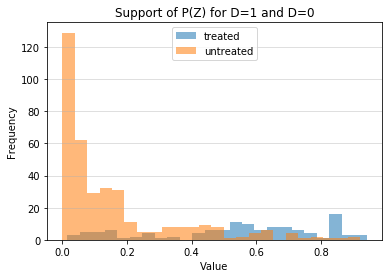

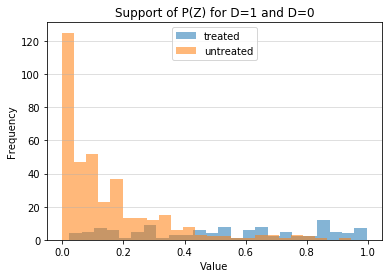

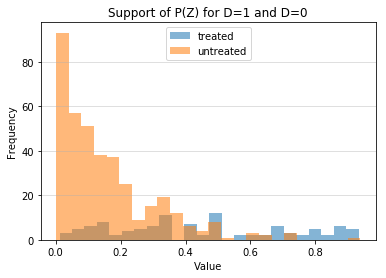

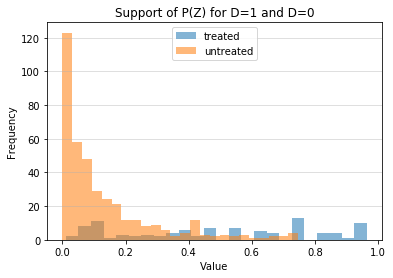

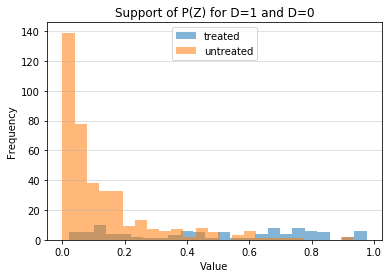

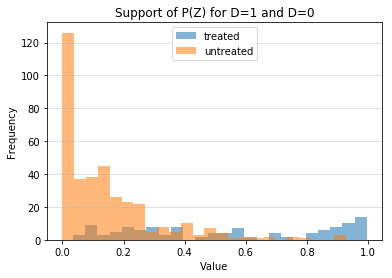

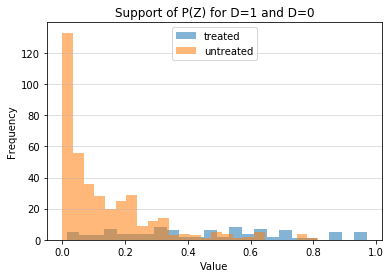

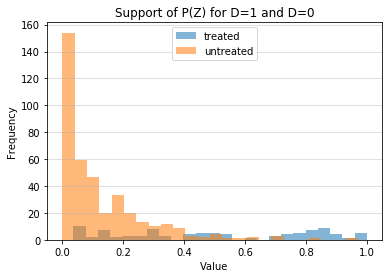

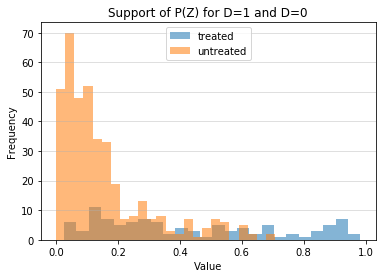

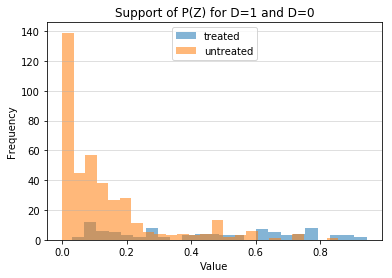

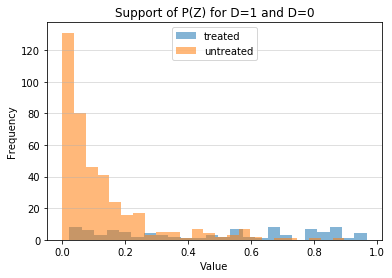

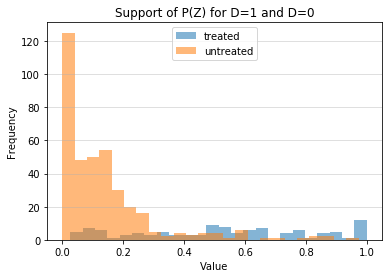

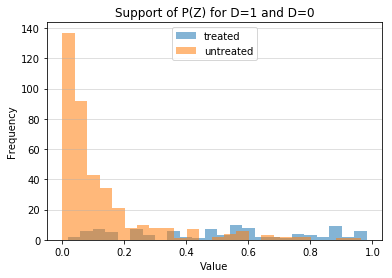

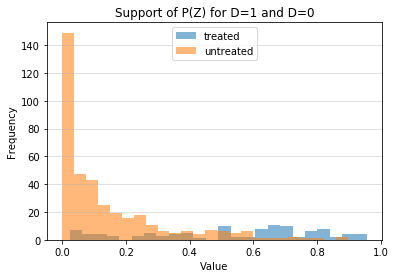

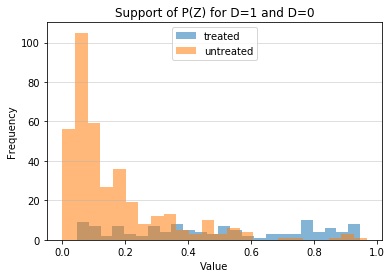

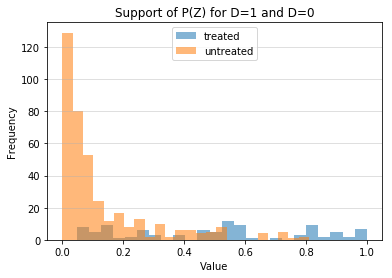

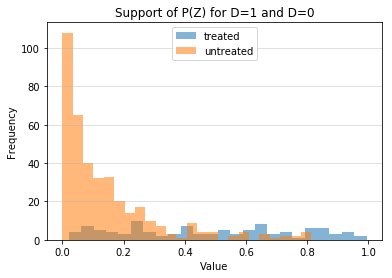

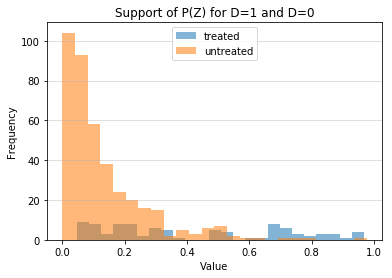

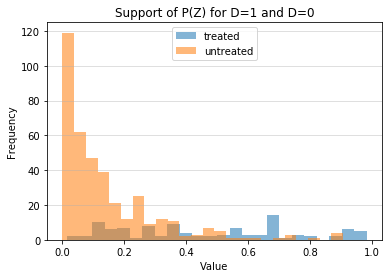

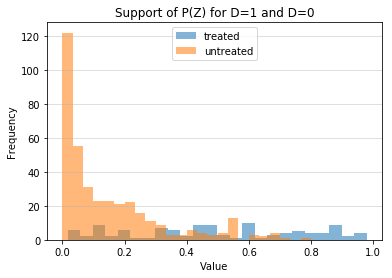

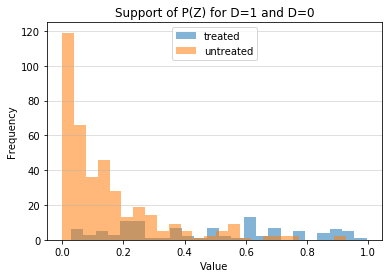

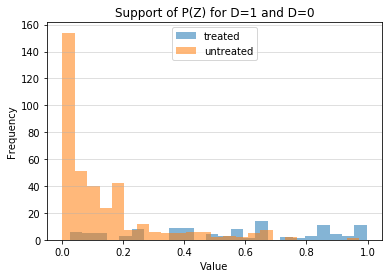

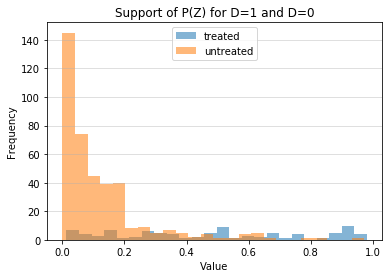

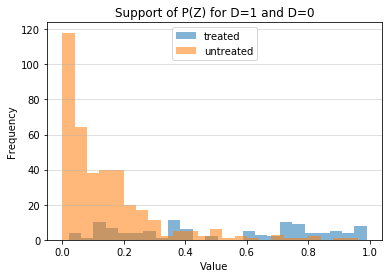

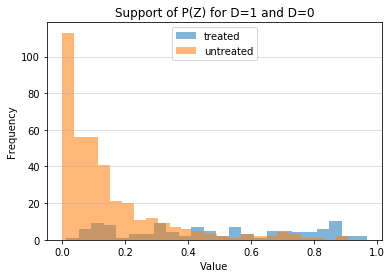

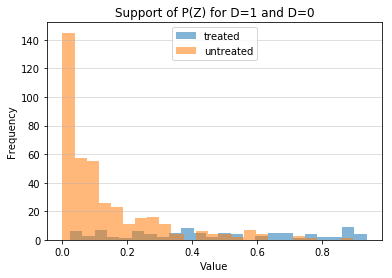

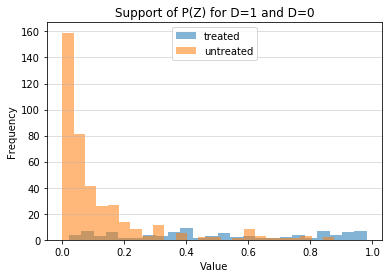

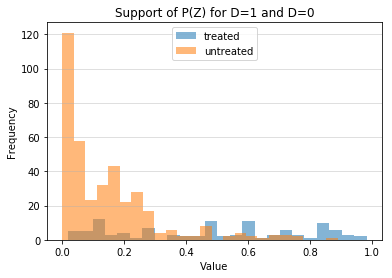

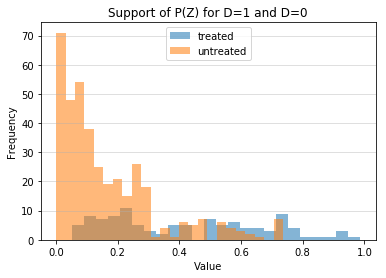

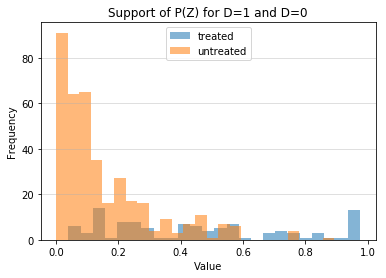

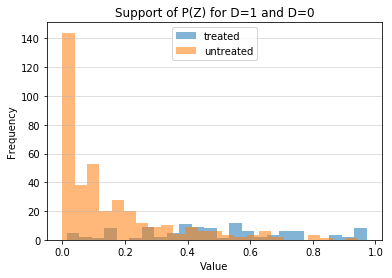

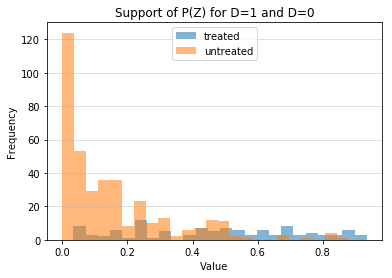

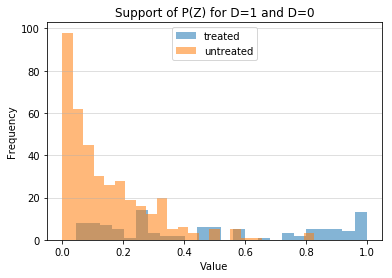

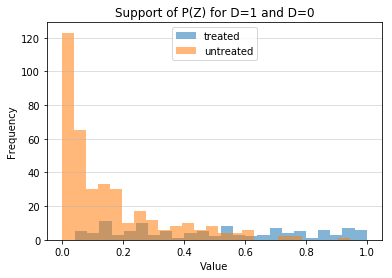

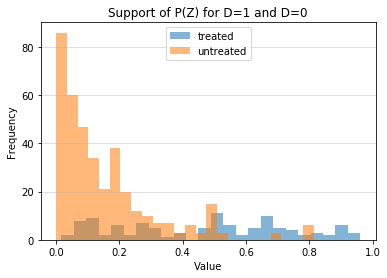

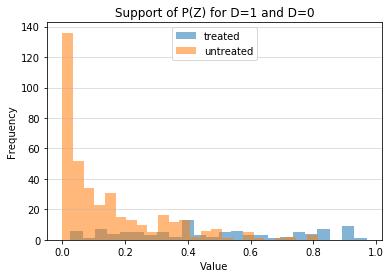

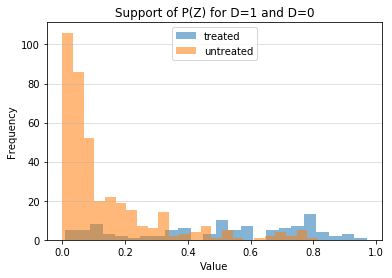

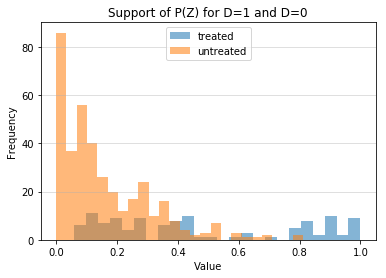

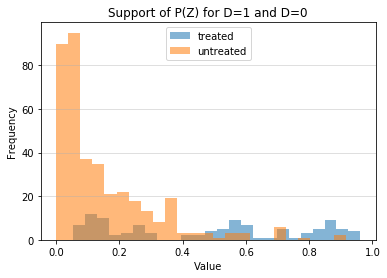

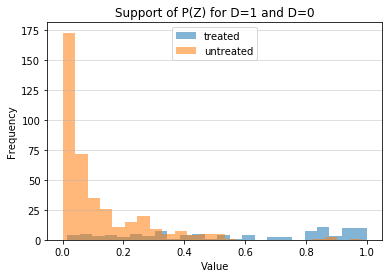

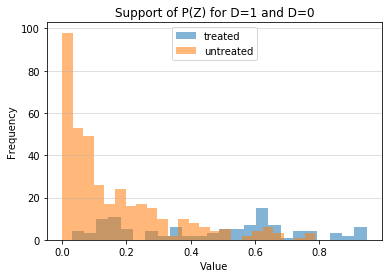

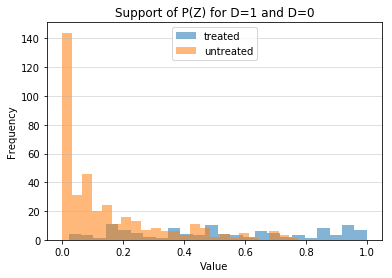

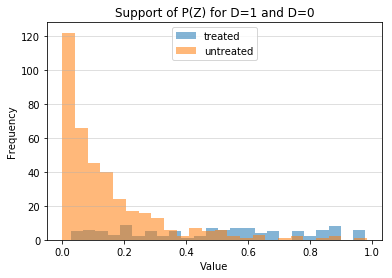

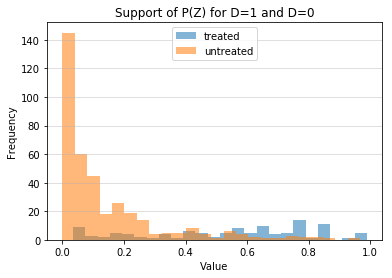

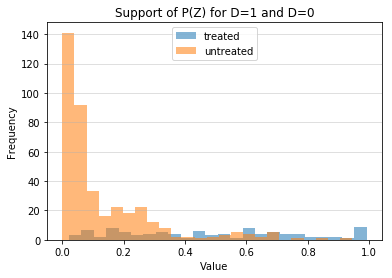

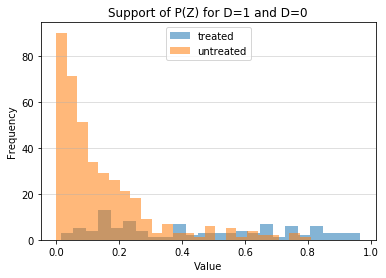

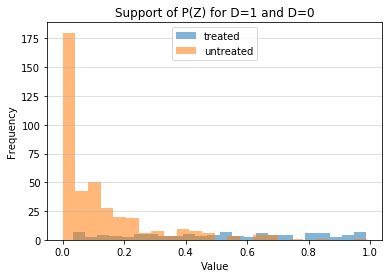

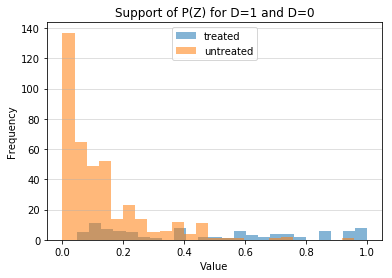

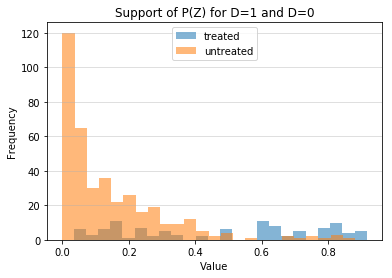

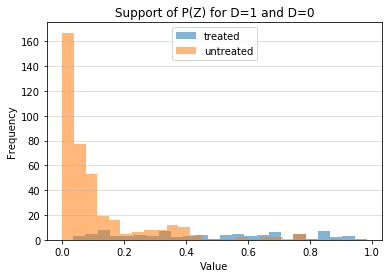

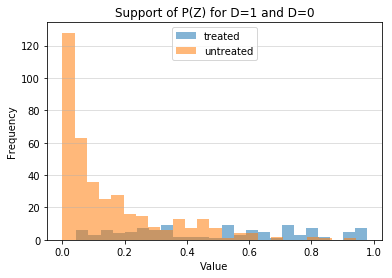

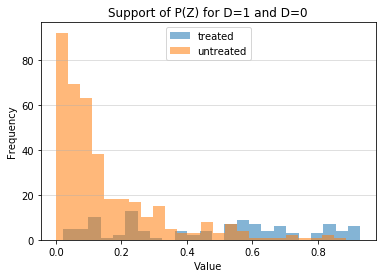

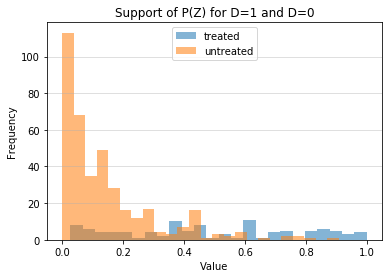

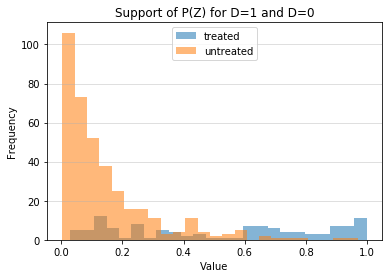

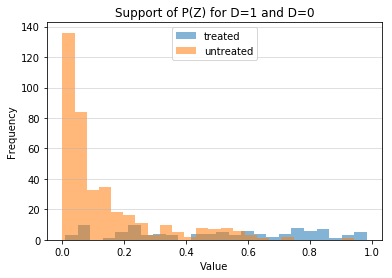

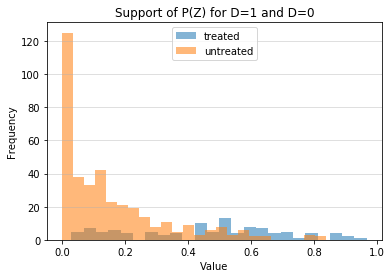

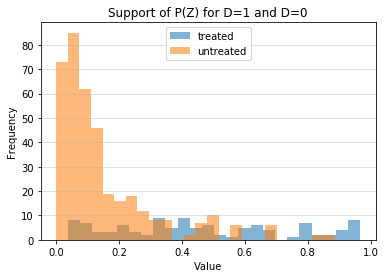

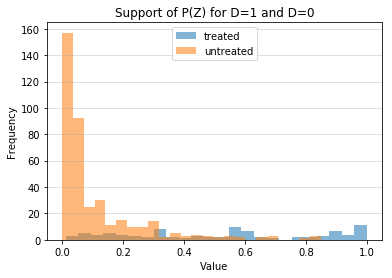

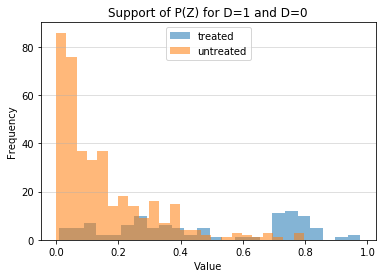

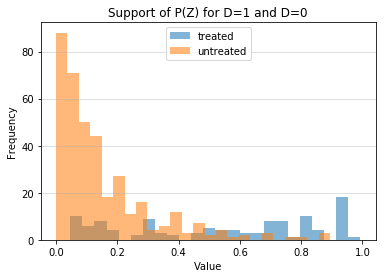

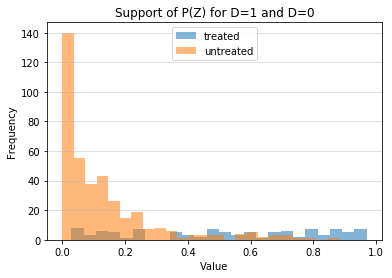

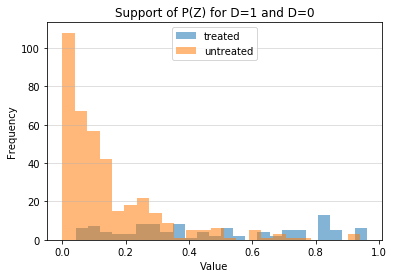

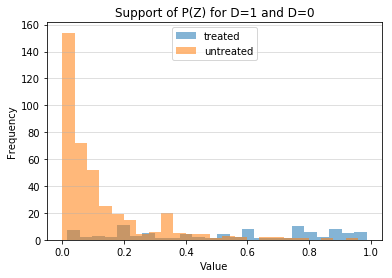

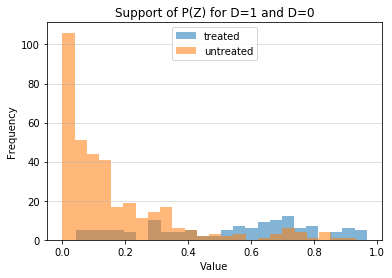

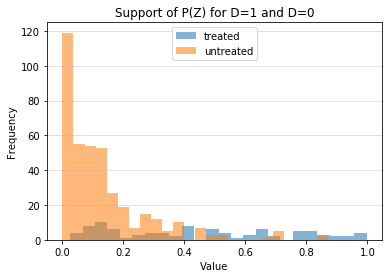

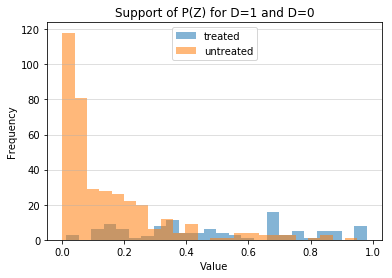

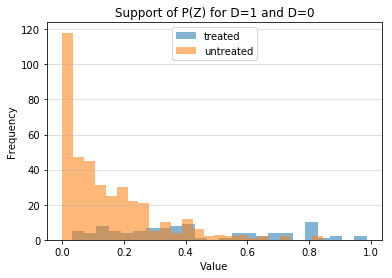

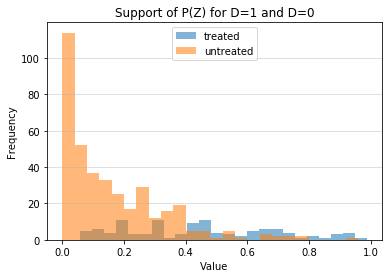

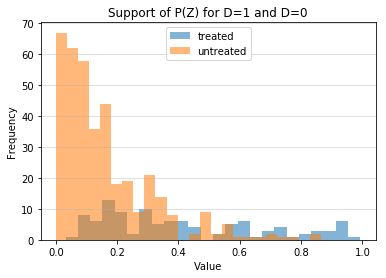

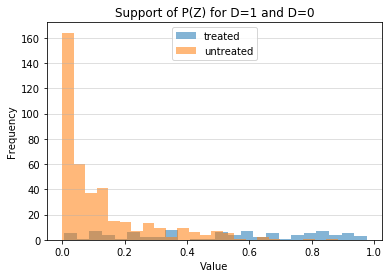

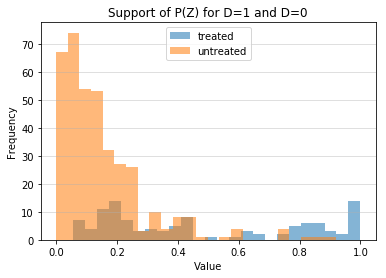

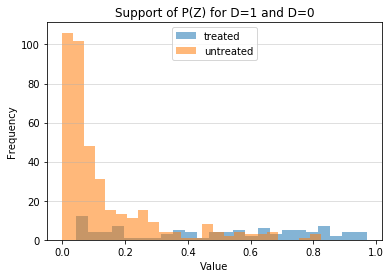

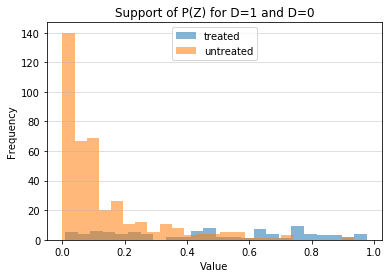

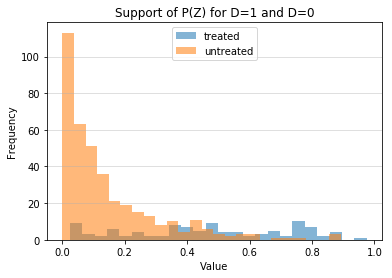

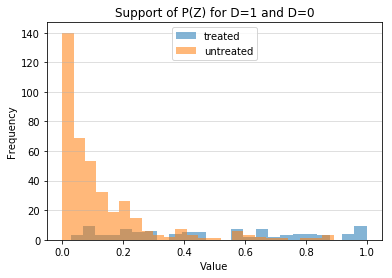

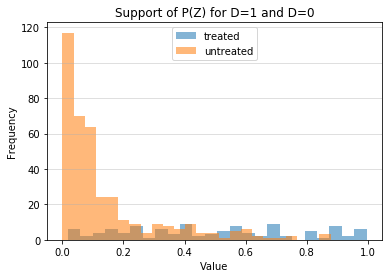

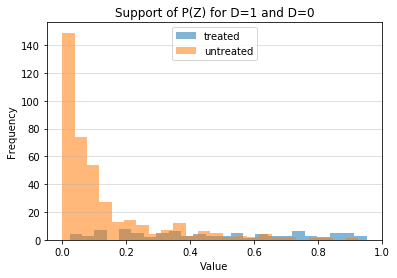

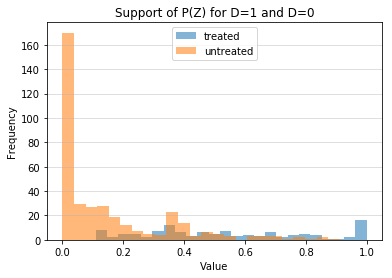

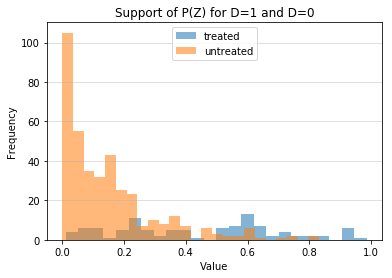

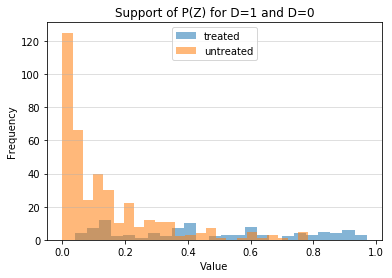

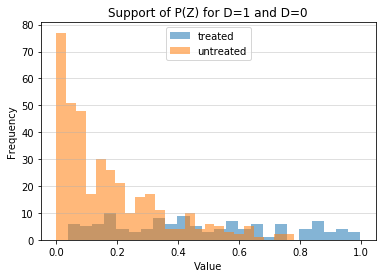

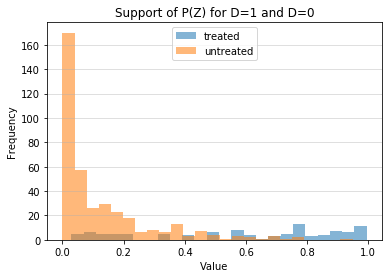

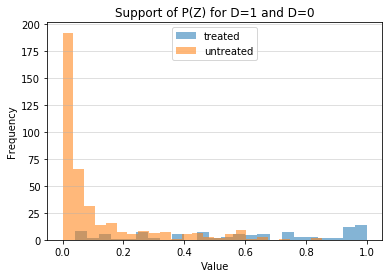

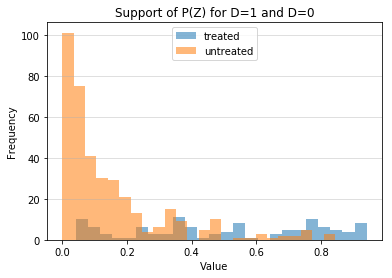

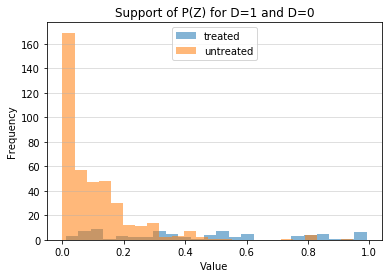

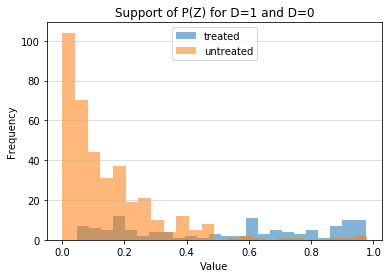

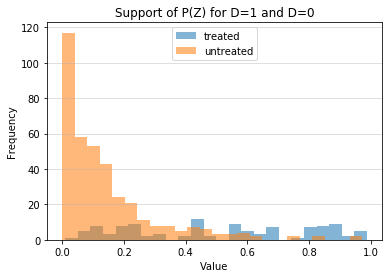

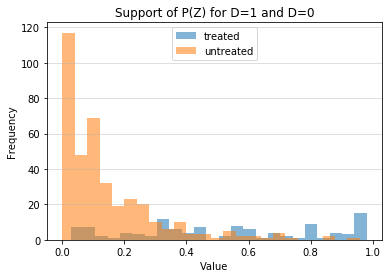

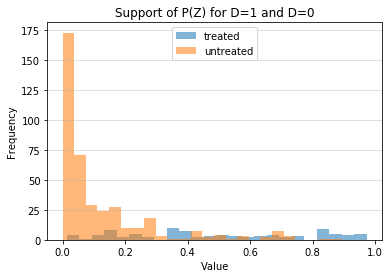

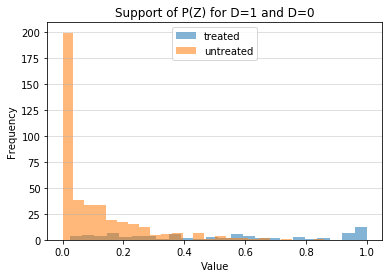

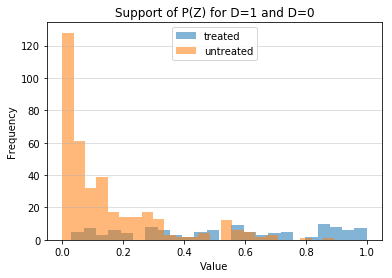

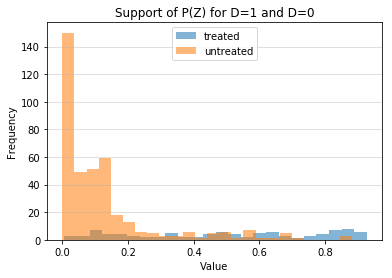

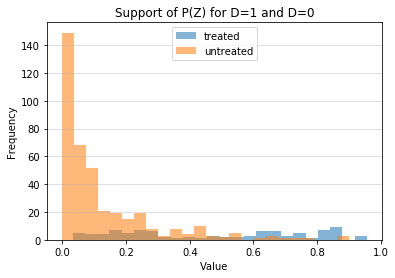

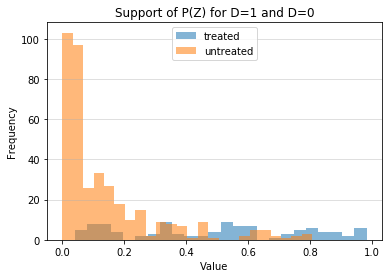

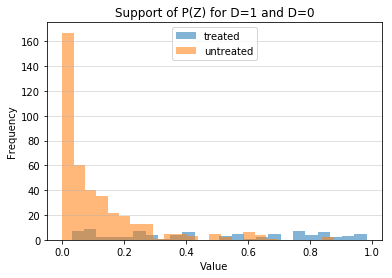

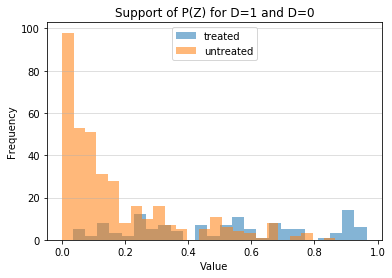

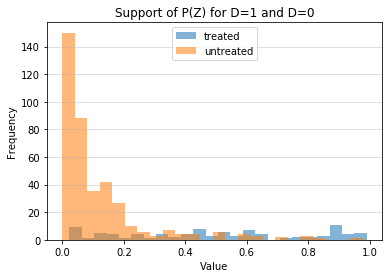

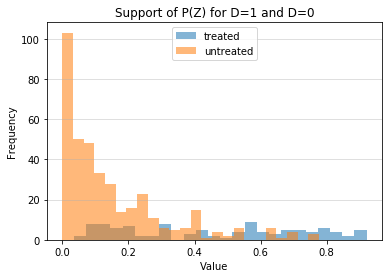

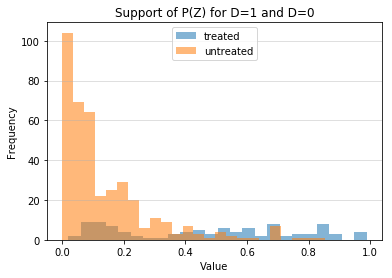

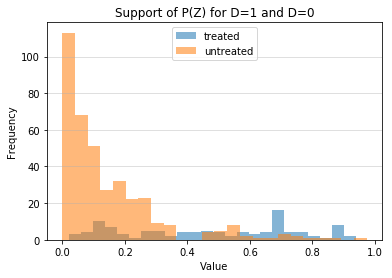

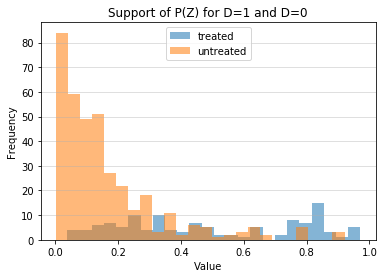

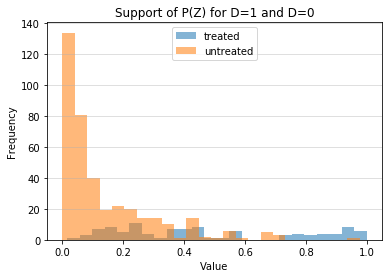

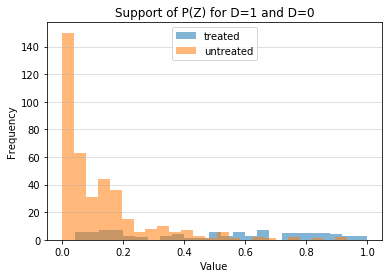

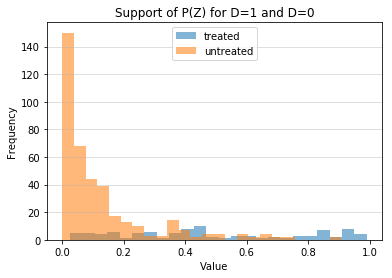

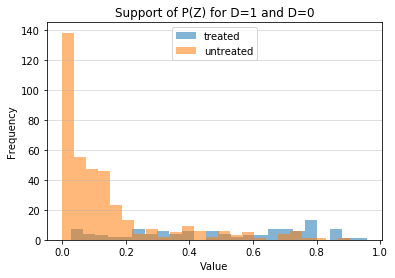

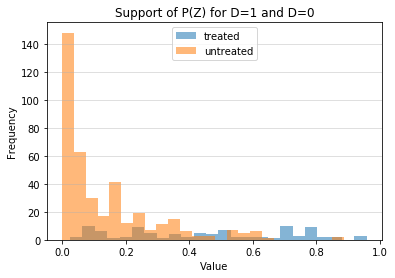

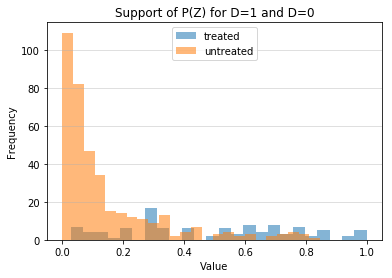

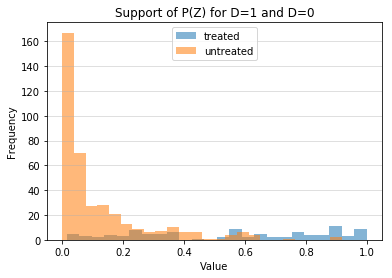

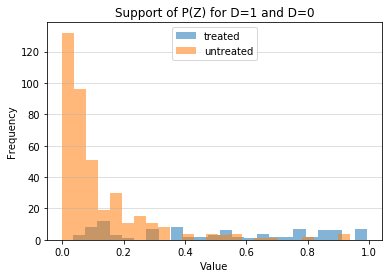

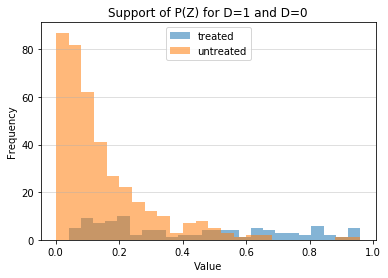

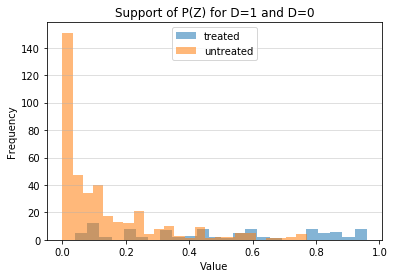

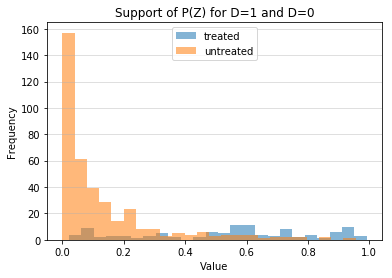

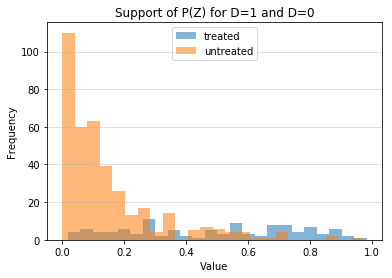

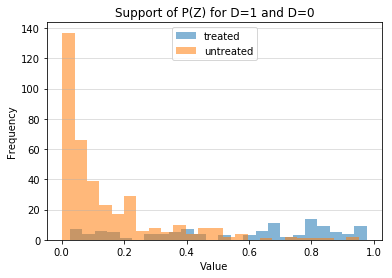

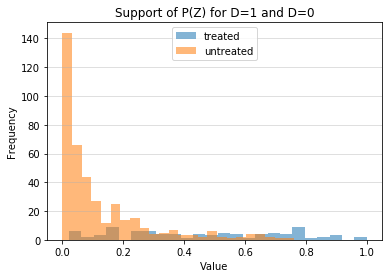

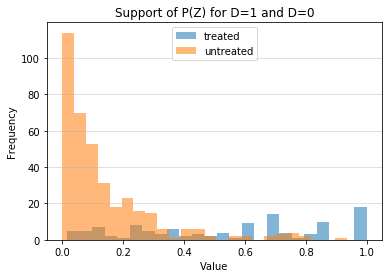

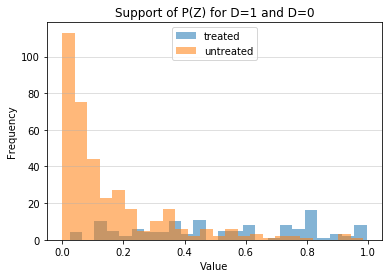

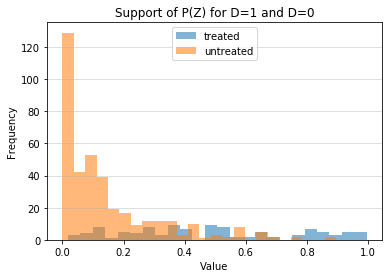

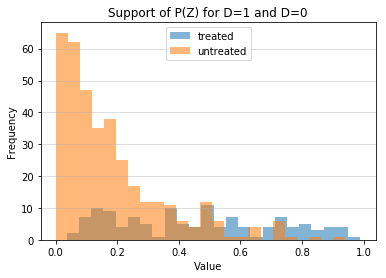

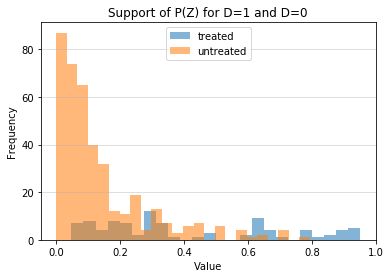

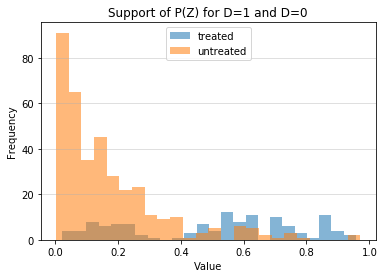

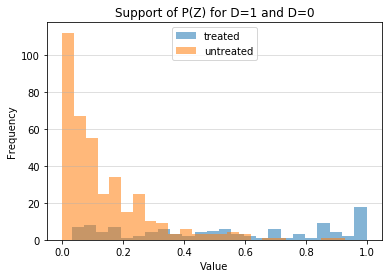

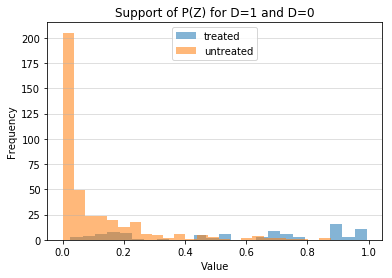

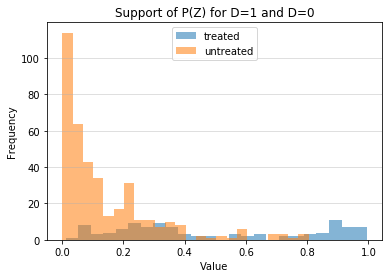

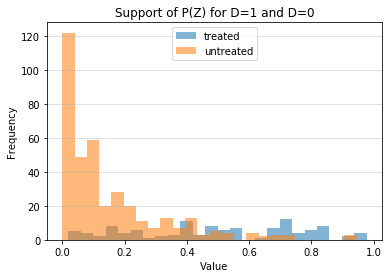

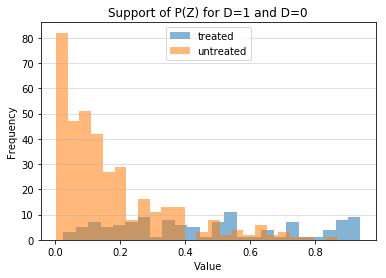

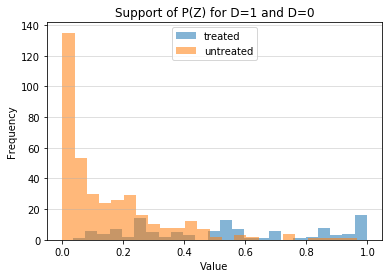

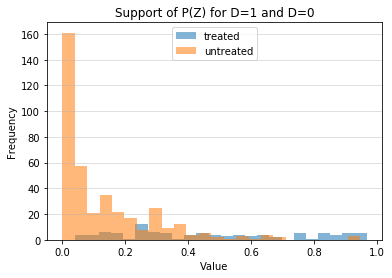

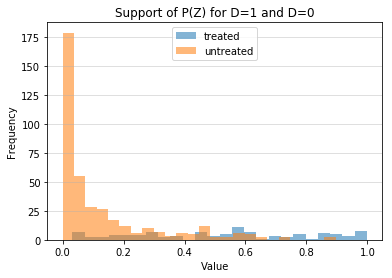

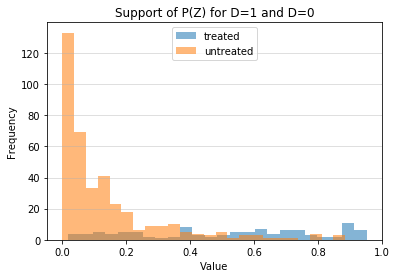

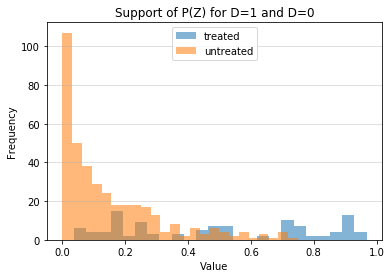

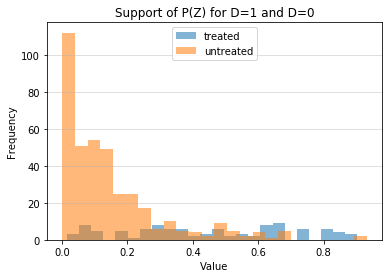

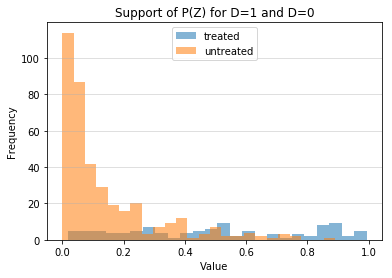

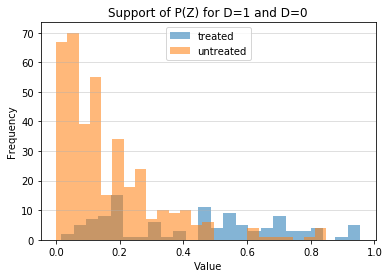

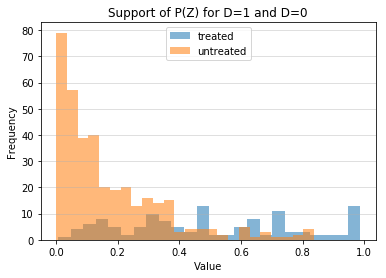

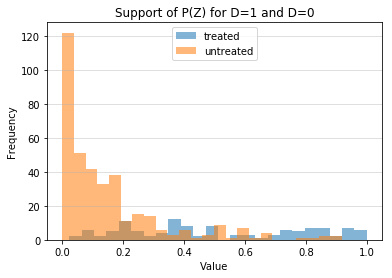

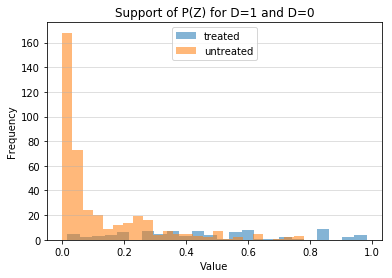

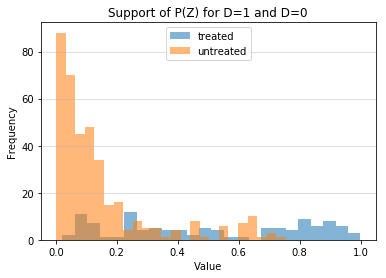

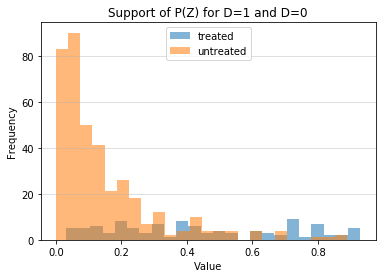

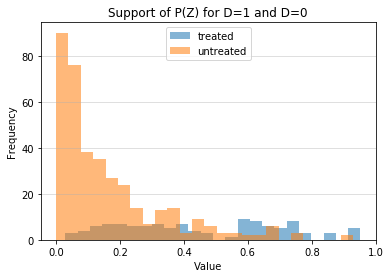

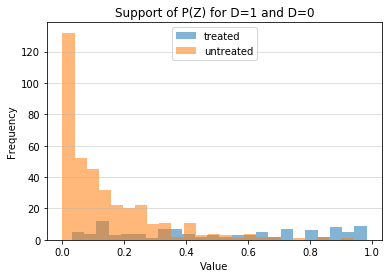

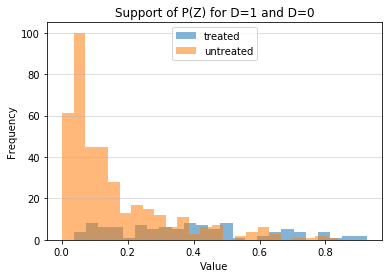

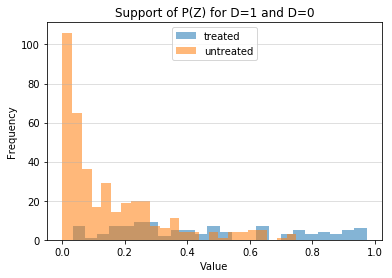

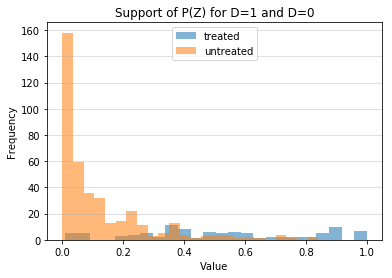

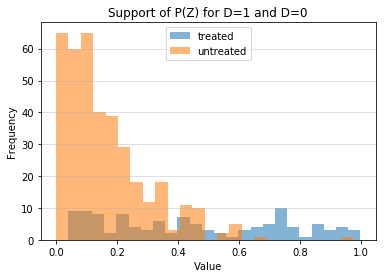

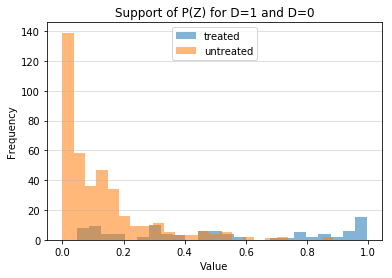

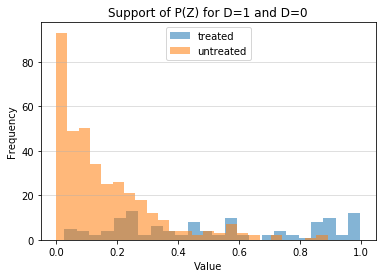

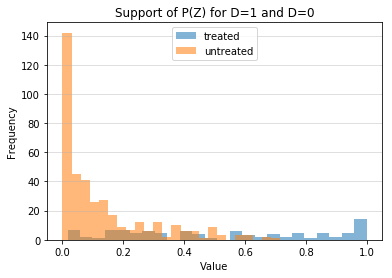

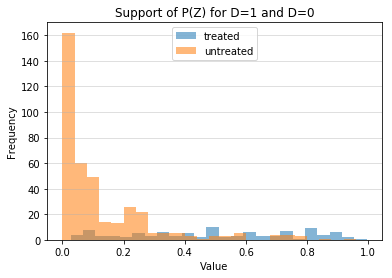

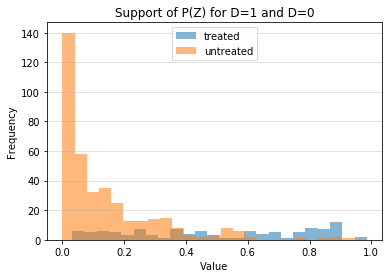

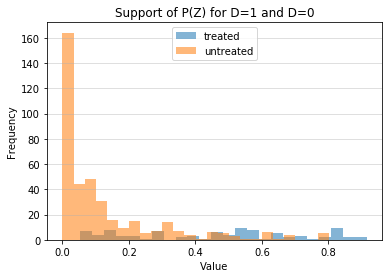

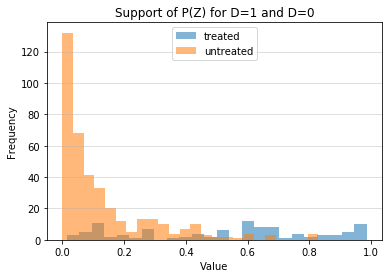

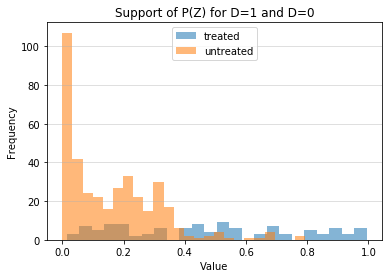

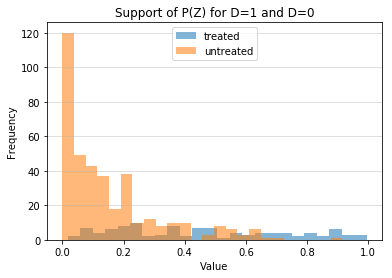

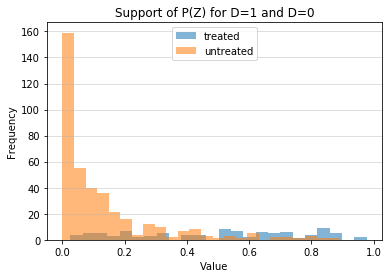

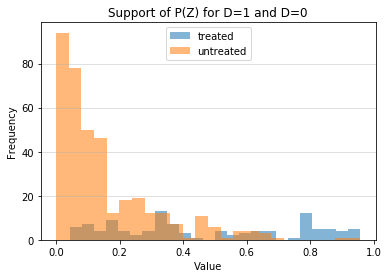

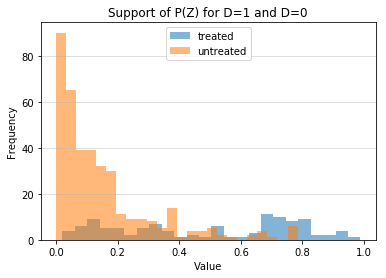

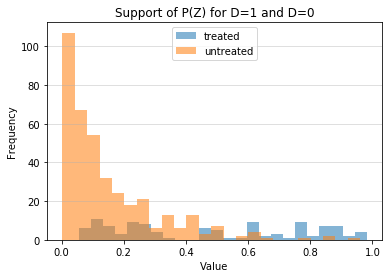

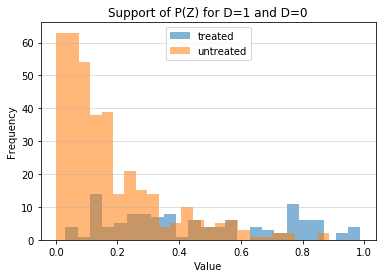

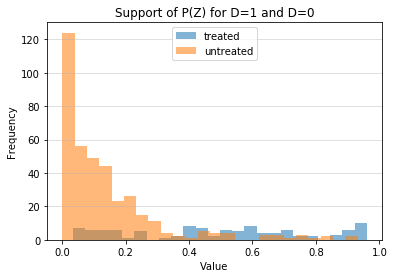

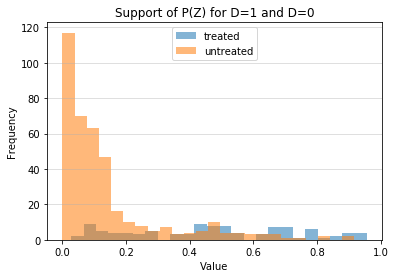

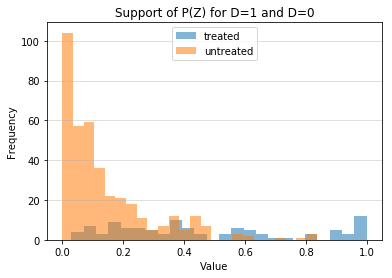

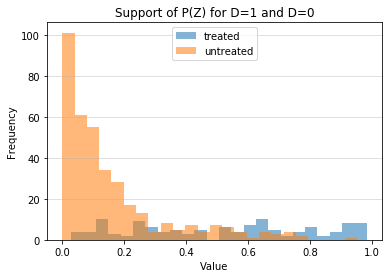

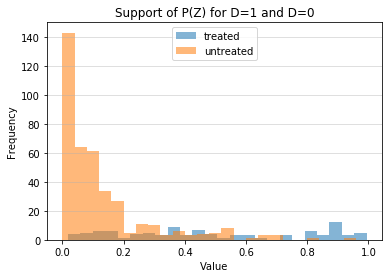

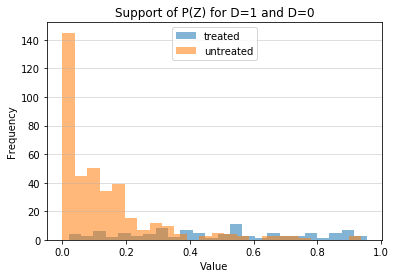

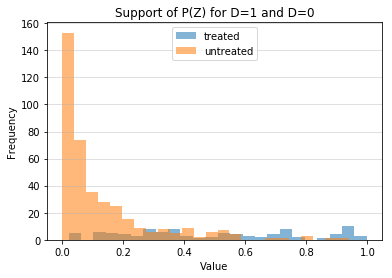

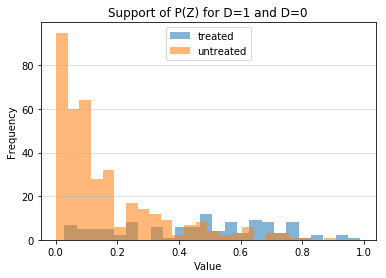

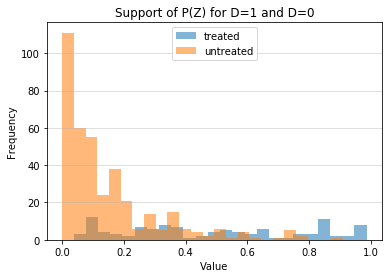

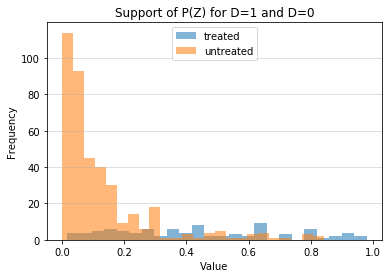

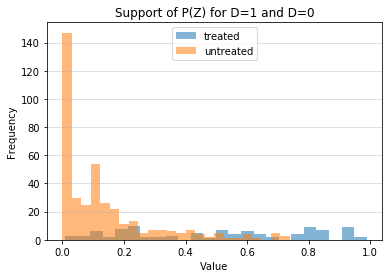

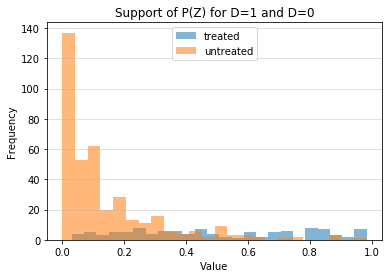

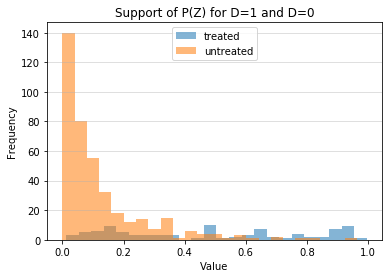

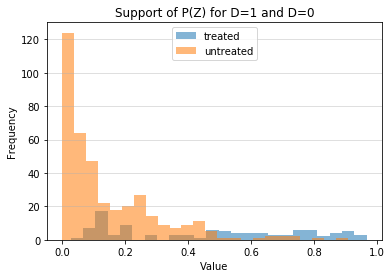

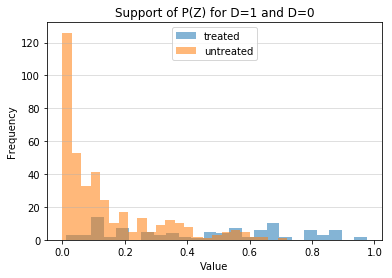

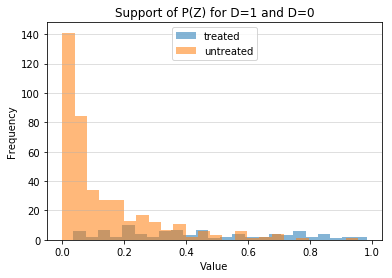

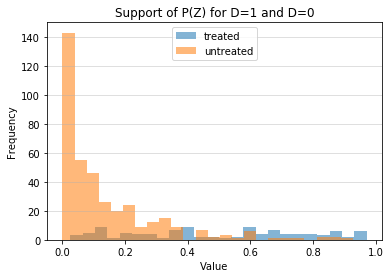

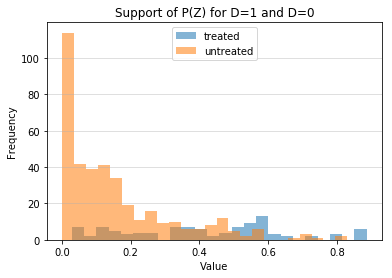

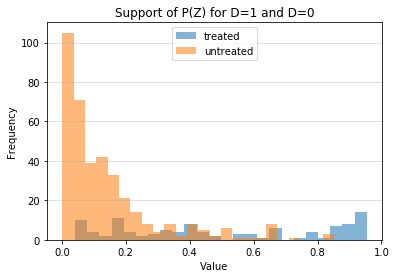

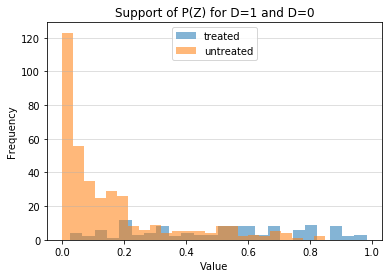

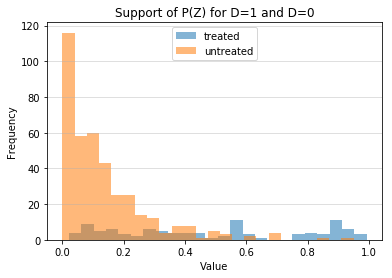

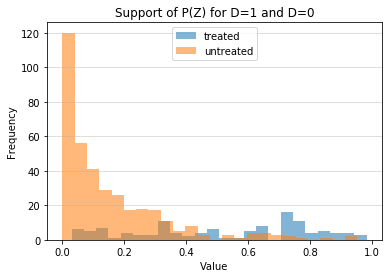

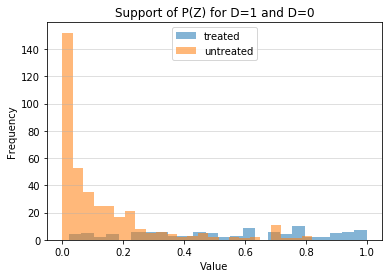

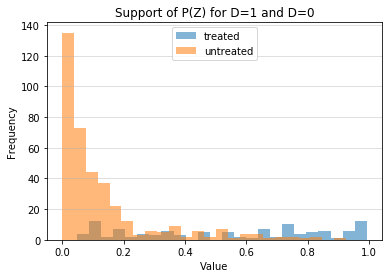

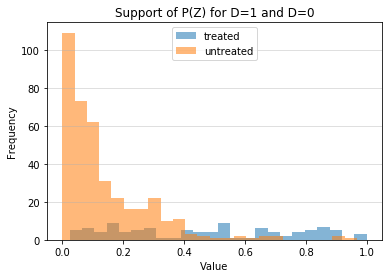

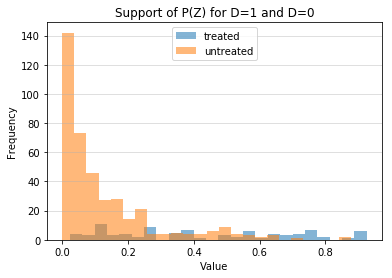

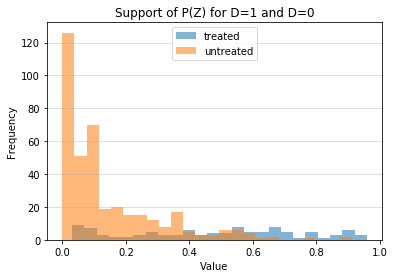

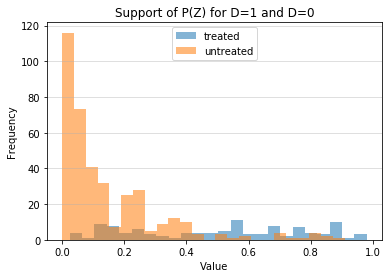

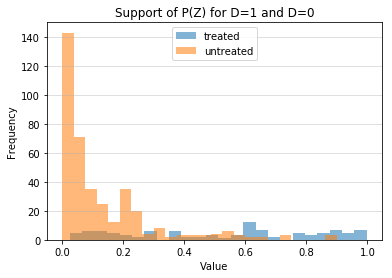

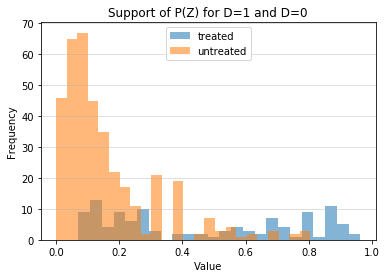

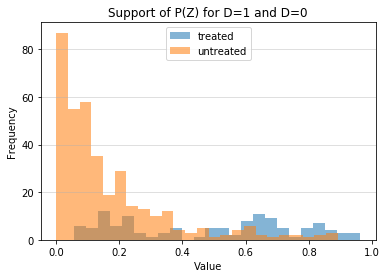

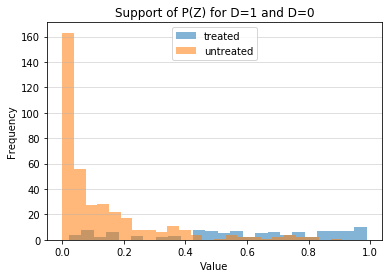

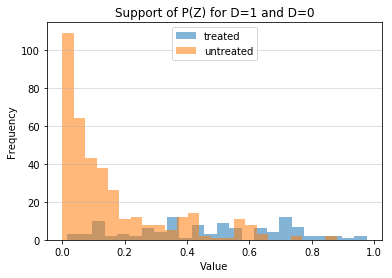

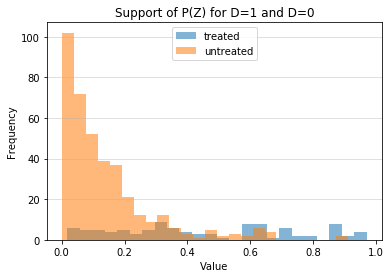

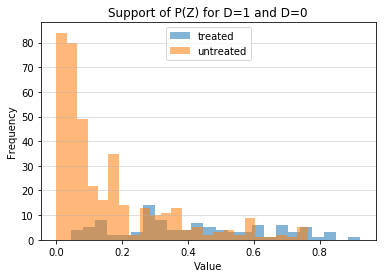

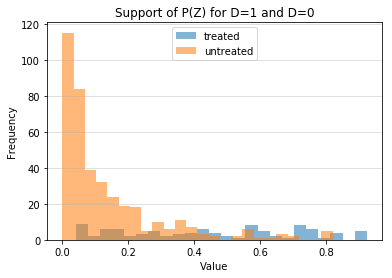

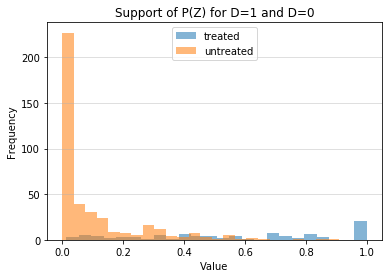

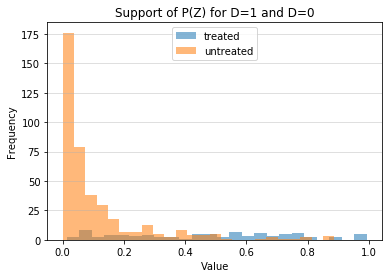

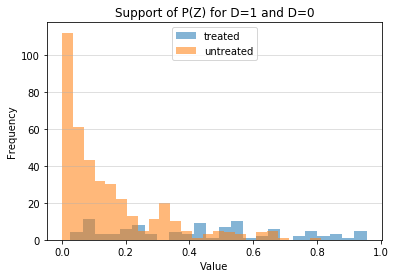

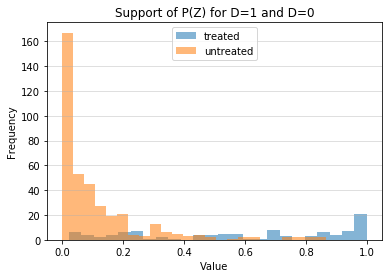

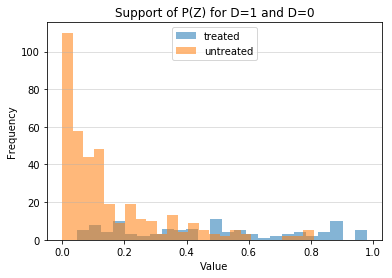

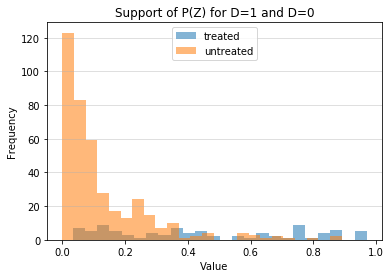

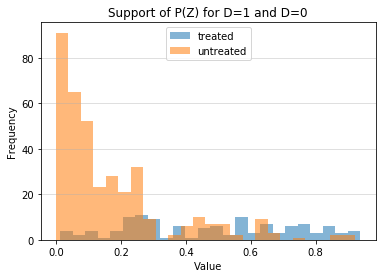

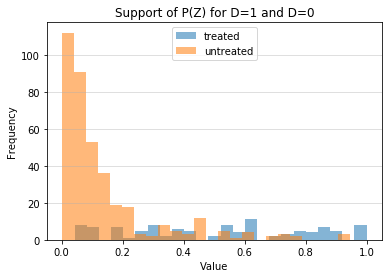

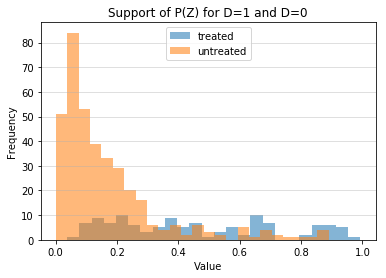

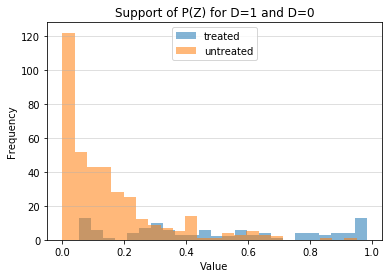

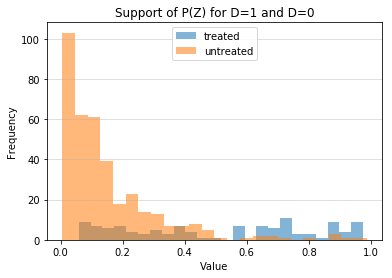

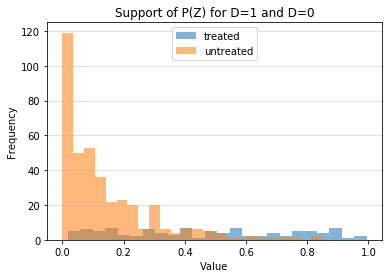

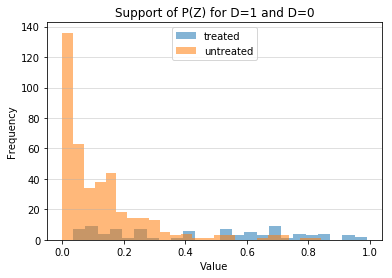

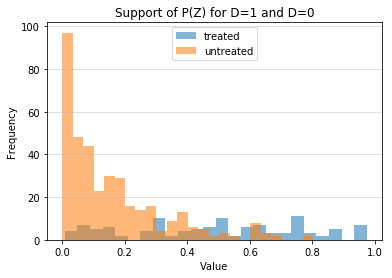

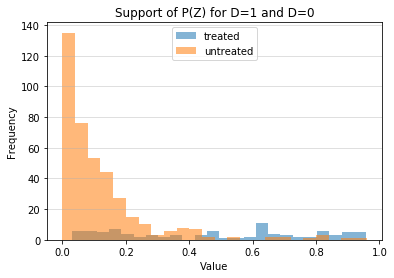

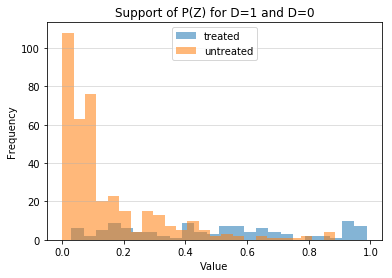

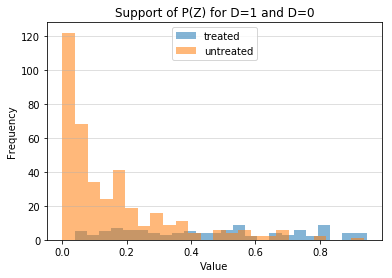

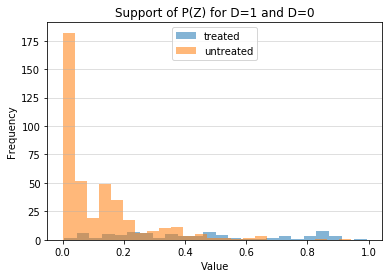

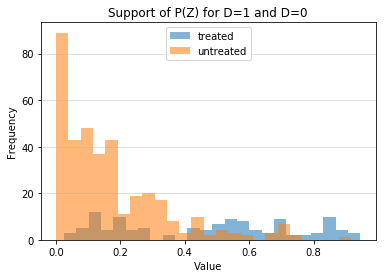

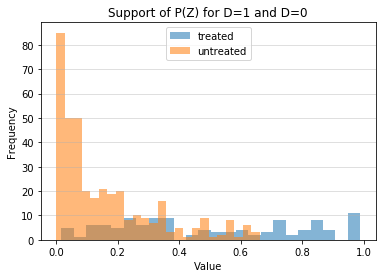

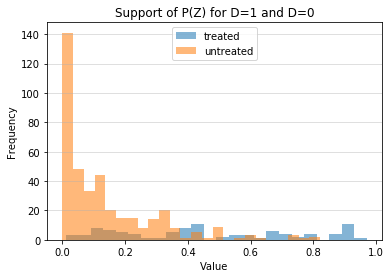

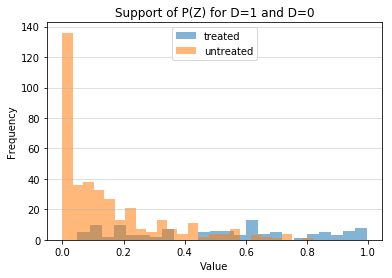

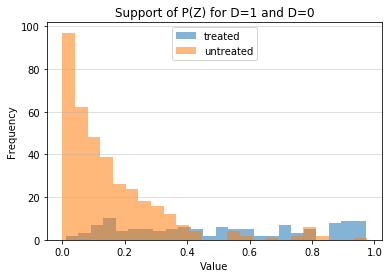

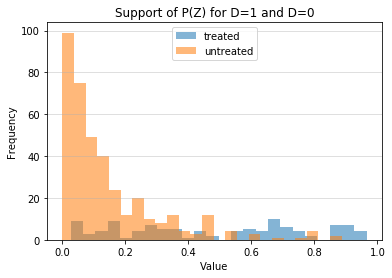

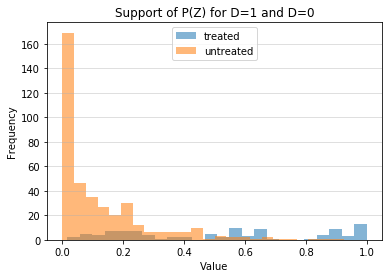

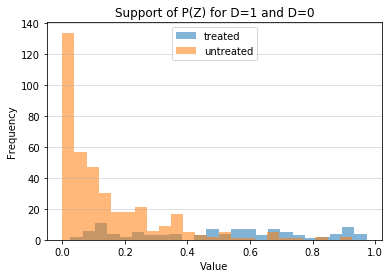

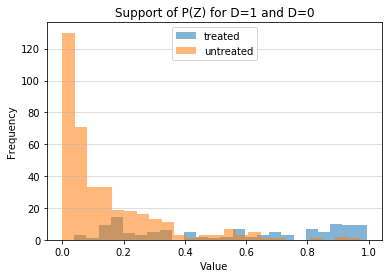

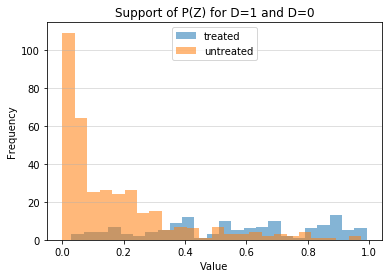

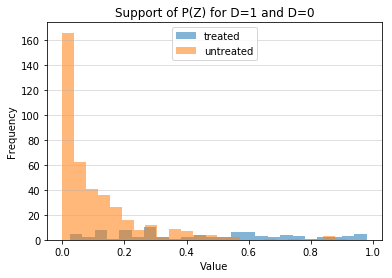

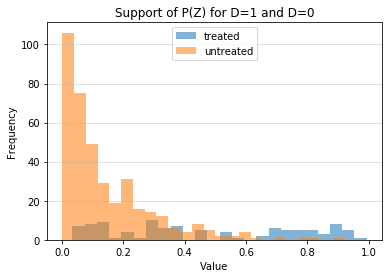

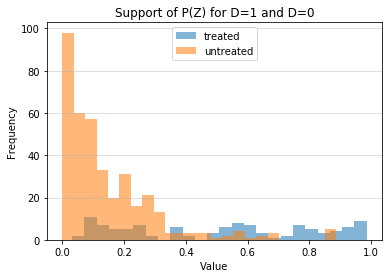

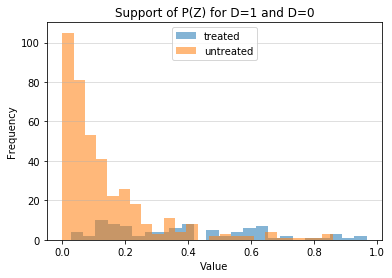

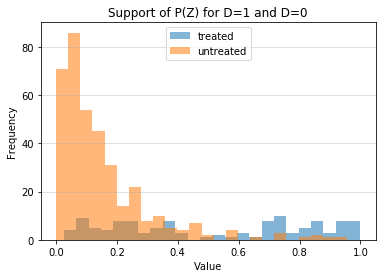

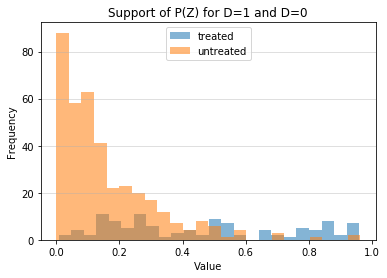

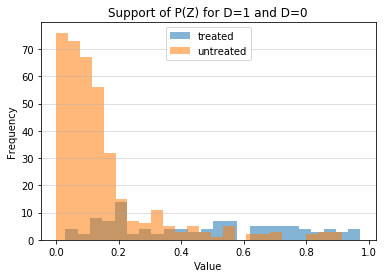

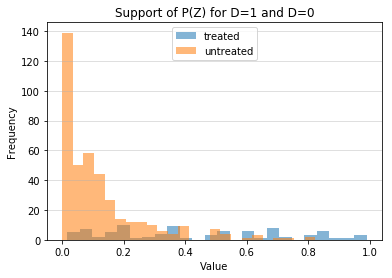

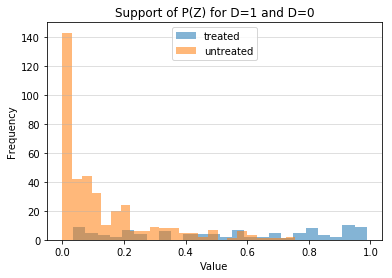

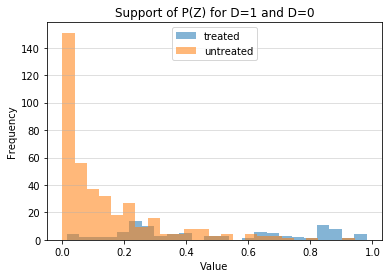

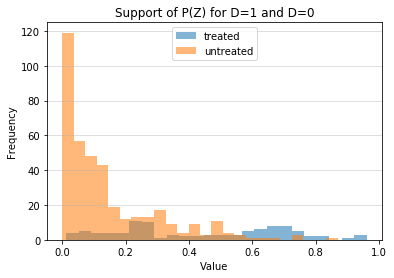

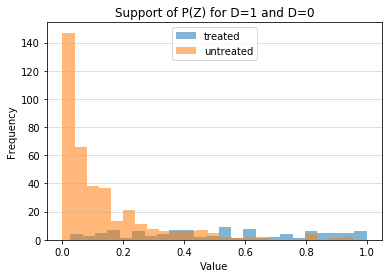

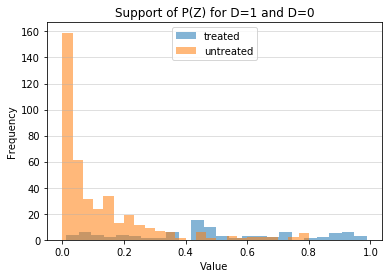

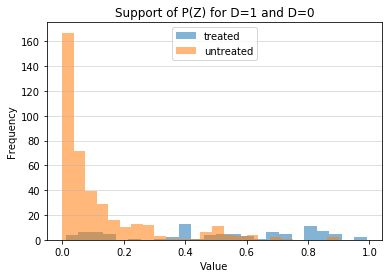

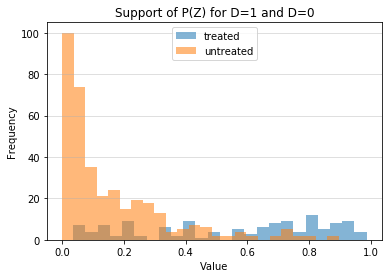

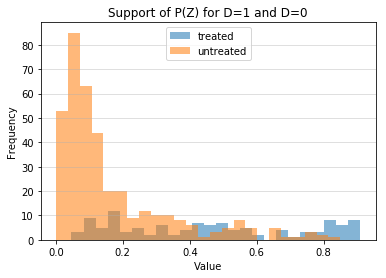

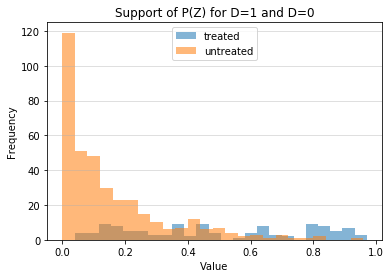

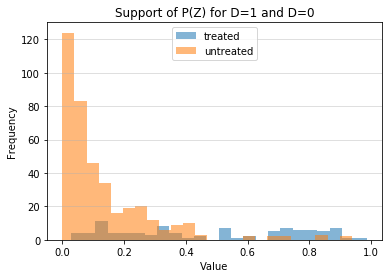

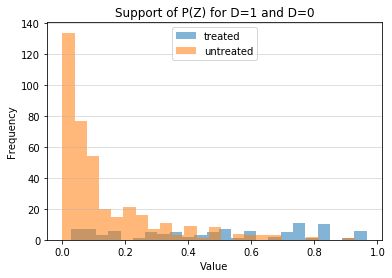

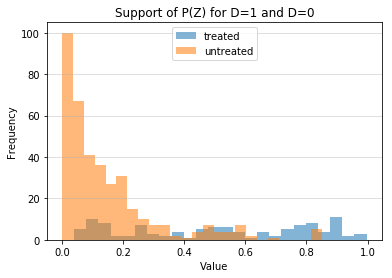

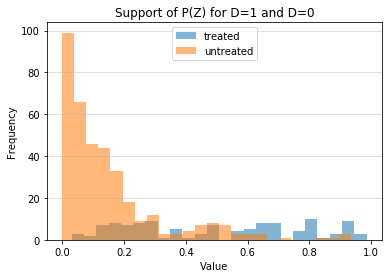

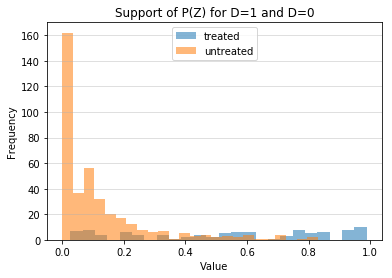

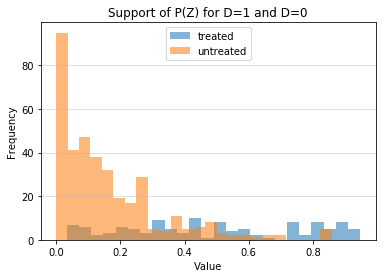

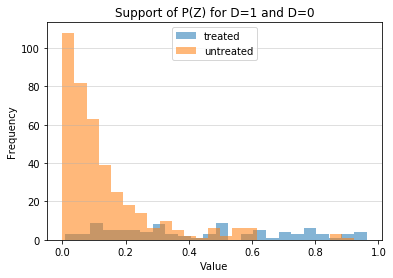

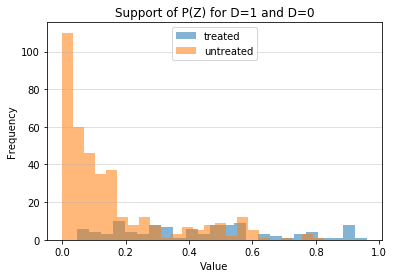

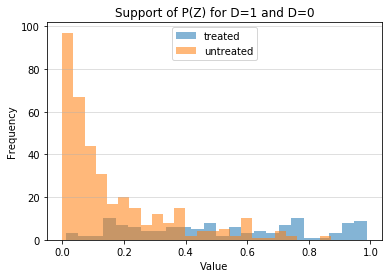

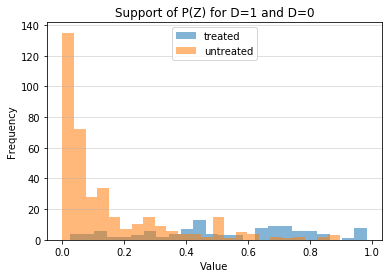

In [8]:
# Draw n bootstrap samples and calculate MTE estimates.
# very volatile
nbootstraps = 250
mte_boot = bootstrap("semipar/files/soep_uni03.yml", nbootstraps)

In [12]:
# mte per year of university education
mte_5 = mte / 5
mte_boot_5 = mte_boot / 5

# Get standard error of MTE at each gridpoint u_D
mte_boot_std = np.std(mte_boot_5, axis=1)

# Compute 90 percent confidence intervals
con_u = mte_5 + norm.ppf(0.95) * mte_boot_std
con_d = mte_5 - norm.ppf(0.95) * mte_boot_std

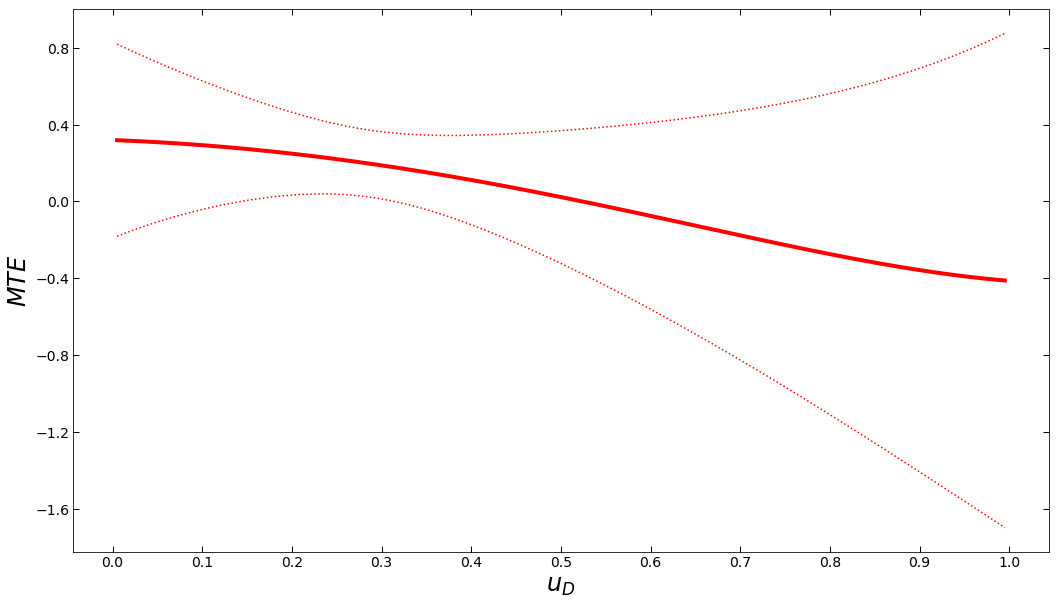

In [14]:
# Plot
ax = plt.figure(figsize=(17.5, 10)).add_subplot(111)

ax.set_ylabel(r"$MTE$", fontsize=24)
ax.set_xlabel("$u_D$", fontsize=24)
ax.tick_params(axis="both" ,direction='in', length=6, width=1, grid_alpha=0.25, labelsize=14)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks(np.arange(0, 1.1, step=0.1))
ax.yaxis.set_ticks(np.arange(-1.6, 1.1, step=0.4))


ax.plot(quantiles3, mte/5, label="$no migrants$", color="red", linewidth=4)
ax.plot(quantiles3, con_u, color="red", linestyle=':')
ax.plot(quantiles3, con_d, color="red", linestyle=':')

plt.show()